<a href="https://colab.research.google.com/github/AndreiAf02/Math574_Project/blob/main/SIR_Fitting_V7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import scipy.integrate
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pymc as pm
%matplotlib inline
import arviz as az
import seaborn as sns

from pymc.ode import DifferentialEquation
from scipy.integrate import odeint

##Google Trends Data:

In [2]:
path_to_data = 'https://raw.githubusercontent.com/AndreiAf02/Math574_Project/main/'

In [3]:
data_Google = pd.read_csv(path_to_data + "Google_trends_V3.csv", sep=",", header=0)
data_Google

,Day_trump,trump_scaled,Day_v2,iran_scaled,moo deng,raygun_scaled,moo_deng_scaled,columb_dna,Day,brics,Mpox,Day_v4,chase_bank
0,2024-07-02,3052.503053,2024-07-25,626.566416,0.000000,0.000000,0,0,2024-08-01,75,0.0,2024-08-03,0.000000
1,2024-07-03,3052.503053,2024-07-26,751.879699,0.000000,0.000000,0,0,2024-08-02,100,62.5,2024-08-04,0.000000
2,2024-07-04,3052.503053,2024-07-27,877.192982,0.000000,0.000000,0,0,2024-08-03,125,0.0,2024-08-05,0.000000
3,2024-07-05,2035.002035,2024-07-28,877.192982,0.000000,0.000000,0,0,2024-08-04,125,62.5,2024-08-06,0.000000
4,2024-07-06,2035.002035,2024-07-29,877.192982,0.000000,0.000000,0,0,2024-08-05,125,62.5,2024-08-07,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,2024-09-28,3052.503053,2024-10-21,1378.446116,19.047619,23.809524,100,1,2024-10-28,675,62.5,2024-10-30,2.941176
89,2024-09-29,3052.503053,2024-10-22,1503.759399,19.047619,23.809524,105,0,2024-10-29,500,62.5,2024-10-31,2.941176
90,2024-09-30,3052.503053,2024-10-23,1253.132832,19.047619,23.809524,100,4,2024-10-30,400,187.5,2024-11-01,0.000000
91,2024-10-01,3052.503053,2024-10-24,1253.132832,19.047619,47.619048,105,2,2024-10-31,350,125.0,2024-11-02,0.000000


In [4]:
## Code inspired by https://stackoverflow.com/questions/66466080/insert-empty-rows-after-each-row

insert_rows = 2

def interpolator(data, label):
    data.index = range(0, insert_rows * len(data), insert_rows)
    new_data = data.reindex(index = range(insert_rows * len(data)))
    new_data = new_data.interpolate(method='linear')
    new_data = new_data[:-2]
    plt.plot(new_data, 'm.-')
    plt.title(label)
    plt.xlabel('Day')
    plt.ylabel('Activity')
    return new_data

#Rachael Gunn ('Raygun'):

         raygun
0      0.000000
1    261.904762
2   1523.809524
3   2047.619048
4   2380.952381
5   2119.047619
6   1666.666667
7   1833.333334
8   1452.380953
9    952.380953
10   833.333333
11   547.619047
12   333.333333
13   238.095238
14   214.285714
15   166.666667
16   166.666667


Text(0, 0.5, 'Activity')

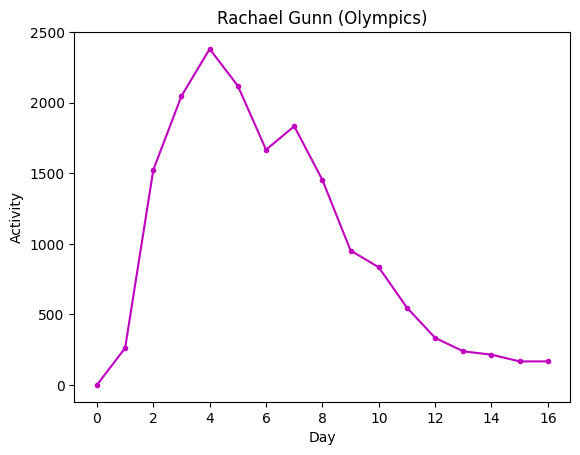

In [5]:
data_raygun=pd.DataFrame()
data_raygun['raygun'] = data_Google['raygun_scaled']
data_raygun = data_raygun[14:31].reset_index(drop=True)

# data_raygun.reset_index(drop=True)
print(data_raygun)
plt.plot(data_raygun, 'm.-')
plt.title('Rachael Gunn (Olympics)')
plt.xlabel('Day')
plt.ylabel('Activity')

          raygun
0       0.000000
1     261.904762
2    1785.714286
3    3833.333334
4    6214.285715
5    8333.333334
6   10000.000001
7   11833.333335
8   13285.714288
9   14238.095240
10  15071.428574
11  15619.047621
12  15952.380955
13  16190.476193
14  16404.761907
15  16571.428574
16  16738.095241


Text(0, 0.5, 'Activity')

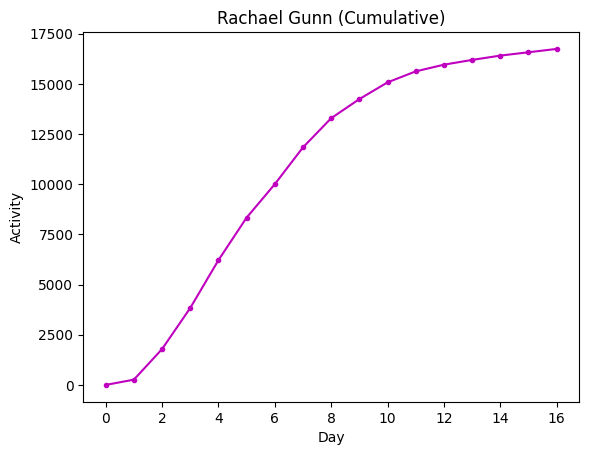

In [6]:
data_raygun_cumul = np.cumsum(data_raygun)
print(data_raygun_cumul)
plt.plot(data_raygun_cumul, 'm.-')
plt.title('Rachael Gunn (Cumulative)')
plt.xlabel('Day')
plt.ylabel('Activity')

,raygun
0,0.000000
1,130.952381
2,261.904762
3,1023.809524
4,1785.714286
5,2809.523810
6,3833.333334
7,5023.809524
8,6214.285715
9,7273.809524


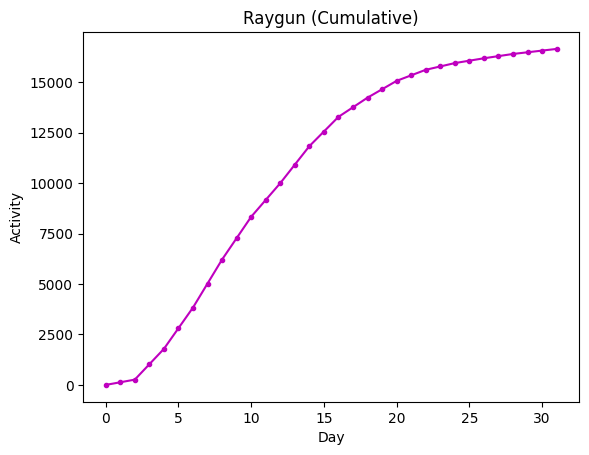

In [7]:
new_data_raygun_cumul = interpolator(data_raygun_cumul, 'Raygun (Cumulative)')
new_data_raygun_cumul

## Moo Deng:

Text(0, 0.5, 'Activity')

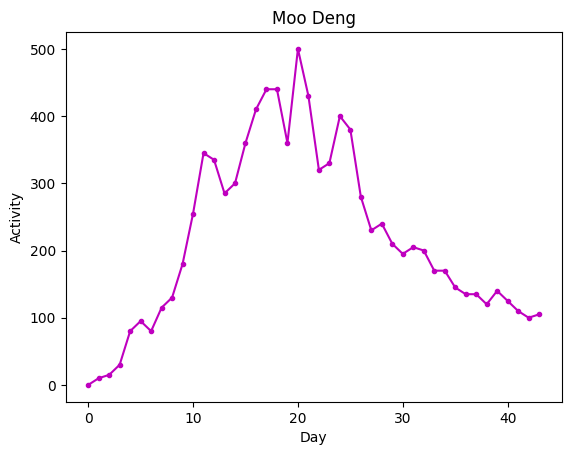

In [8]:
data_moo = pd.DataFrame(data_Google['moo_deng_scaled'])
data_moo = data_moo[46:90].reset_index(drop=True)
plt.plot(data_moo, 'm.-')
plt.title('Moo Deng')
plt.xlabel('Day')
plt.ylabel('Activity')

    moo_deng_scaled
0                 0
1                10
2                25
3                55
4               135
5               230
6               310
7               425
8               555
9               735
10              990
11             1335
12             1670
13             1955
14             2255
15             2615
16             3025
17             3465
18             3905
19             4265
20             4765
21             5195
22             5515
23             5845
24             6245
25             6625
26             6905
27             7135
28             7375
29             7585
30             7780
31             7985
32             8185
33             8355
34             8525
35             8670
36             8805
37             8940
38             9060
39             9200
40             9325
41             9435
42             9535
43             9640


Text(0, 0.5, 'Activity')

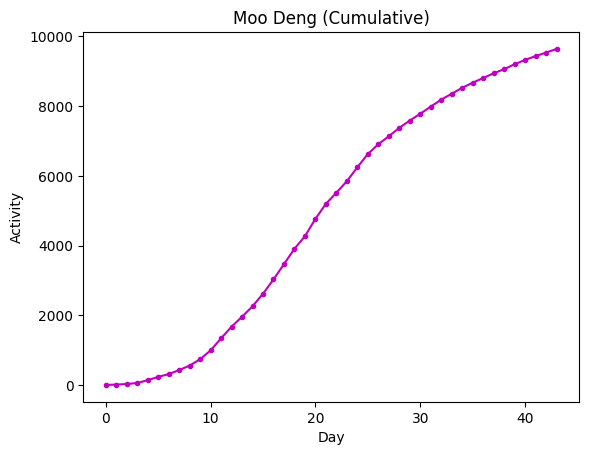

In [9]:
data_moo_cumul = np.cumsum(data_moo)
print(data_moo_cumul)
plt.plot(data_moo_cumul, 'm.-')
plt.title('Moo Deng (Cumulative)')
plt.xlabel('Day')
plt.ylabel('Activity')

,moo_deng_scaled
0,0.0
1,5.0
2,10.0
3,17.5
4,25.0
...,...
81,9380.0
82,9435.0
83,9485.0
84,9535.0


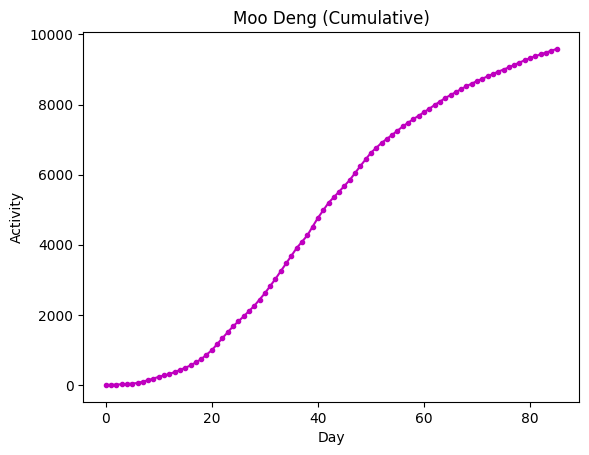

In [10]:
new_data_moo_cumul = interpolator(data_moo_cumul, 'Moo Deng (Cumulative)')
new_data_moo_cumul

## Christopher Columbus:

Text(0, 0.5, 'Activity')

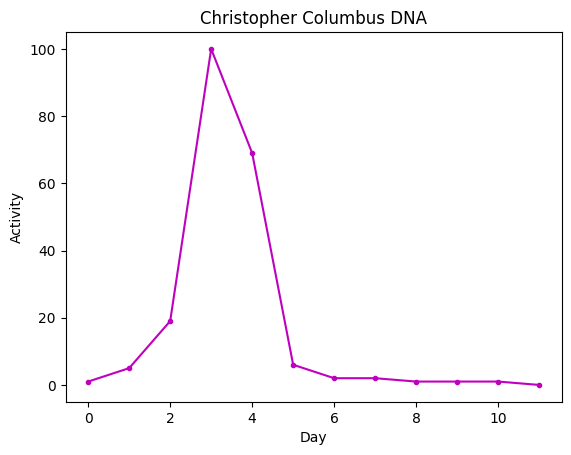

In [11]:
data_columb = pd.DataFrame(data_Google['columb_dna'])
data_columb = data_columb[78:90].reset_index(drop=True)
plt.plot(data_columb, 'm.-')
plt.title('Christopher Columbus DNA')
plt.xlabel('Day')
plt.ylabel('Activity')

    columb_dna
0            1
1            6
2           25
3          125
4          194
5          200
6          202
7          204
8          205
9          206
10         207
11         207


Text(0, 0.5, 'Activity')

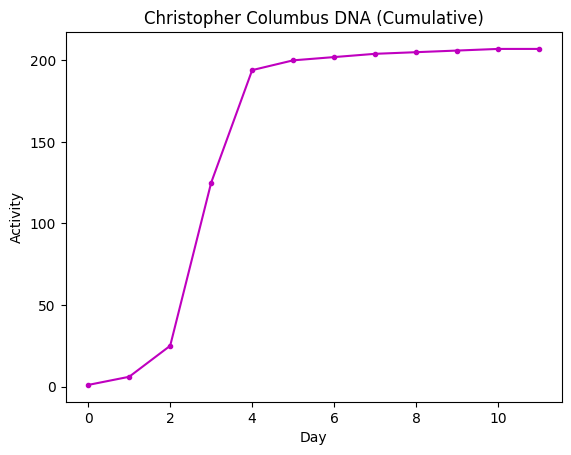

In [12]:
data_columb_cumul = np.cumsum(data_columb)
print(data_columb_cumul)
plt.plot(data_columb_cumul, 'm.-')
plt.title('Christopher Columbus DNA (Cumulative)')
plt.xlabel('Day')
plt.ylabel('Activity')

,columb_dna
0,1.0
1,3.5
2,6.0
3,15.5
4,25.0
5,75.0
6,125.0
7,159.5
8,194.0
9,197.0


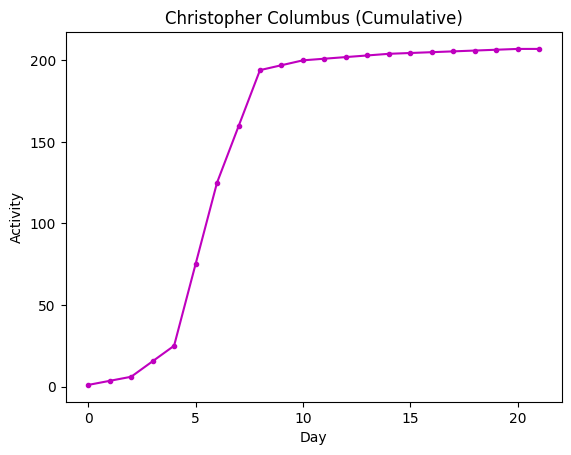

In [13]:
new_data_columb_cumul = interpolator(data_columb_cumul, 'Christopher Columbus (Cumulative)')
new_data_columb_cumul

## Trump:

Text(0, 0.5, 'Activity')

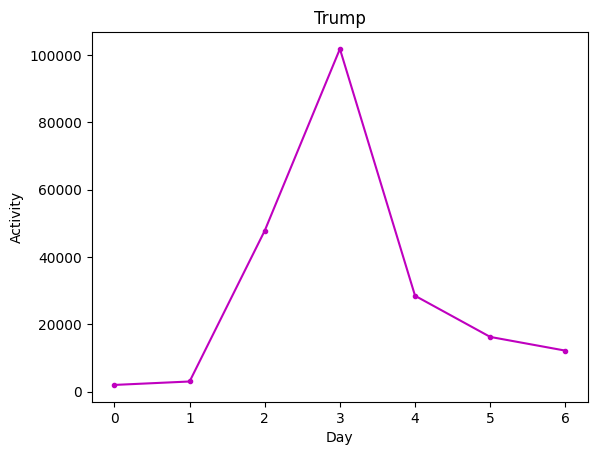

In [17]:
data_trump = pd.DataFrame(data_Google['trump_scaled'])
data_trump = data_trump[9:16].reset_index(drop=True)
# print(data_raygun)
plt.plot(data_trump, 'm.-')
plt.title('Trump')
plt.xlabel('Day')
plt.ylabel('Activity')

    trump_scaled
0    2035.002035
1    5087.505088
2   52910.052918
3  154660.154718
4  183150.183208
5  199430.199488
6  211640.211698


Text(0, 0.5, 'Activity')

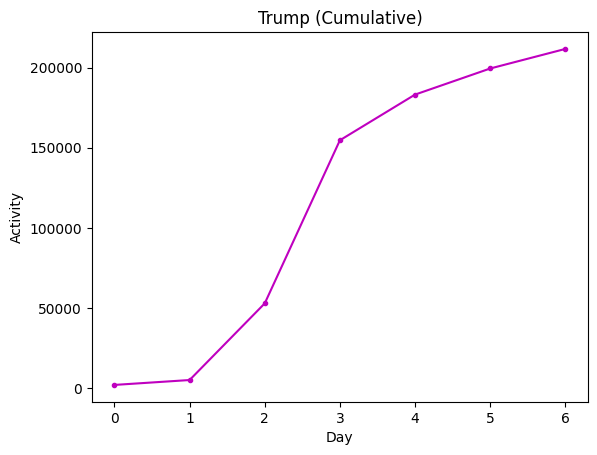

In [18]:
data_trump_cumul = np.cumsum(data_trump)
print(data_trump_cumul)
plt.plot(data_trump_cumul, 'm.-')
plt.title('Trump (Cumulative)')
plt.xlabel('Day')
plt.ylabel('Activity')

,trump_scaled
0,2035.002035
1,3561.253561
2,5087.505088
3,28998.779003
4,52910.052918
5,103785.103818
6,154660.154718
7,168905.168963
8,183150.183208
9,191290.191348


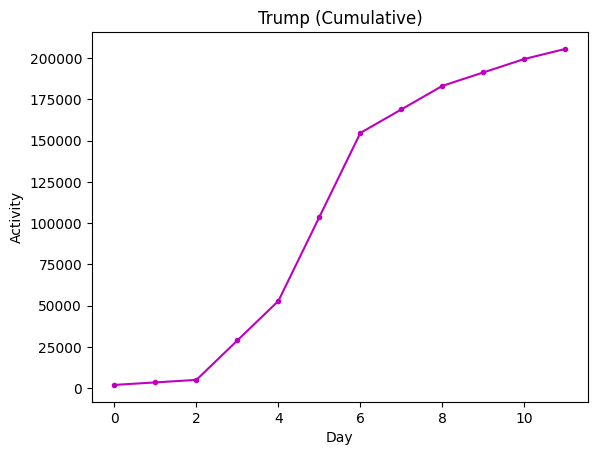

In [19]:
new_data_trump_cumul = interpolator(data_trump_cumul, 'Trump (Cumulative)')
new_data_trump_cumul

##Iran:

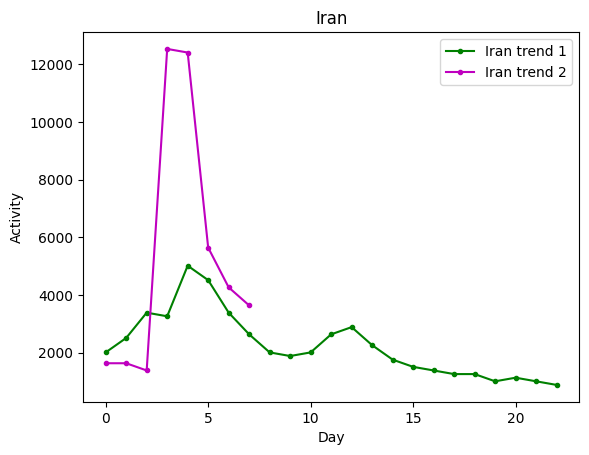

In [20]:
data_iran = pd.DataFrame(data_Google['iran_scaled'])
data_iran1 = data_iran[7:30].reset_index(drop=True)
data_iran2 = data_iran[65:73].reset_index(drop=True)
# print(data_raygun)
plt.plot(data_iran1, 'g.-')
plt.plot(data_iran2, 'm.-')
plt.title('Iran')
plt.xlabel('Day')
plt.ylabel('Activity')
plt.legend(['Iran trend 1', 'Iran trend 2'])

    iran_scaled
0   1629.072682
1   3258.145364
2   4636.591480
3  17167.919800
4  29573.934840
5  35213.032585
6  39473.684214
7  43107.769427


Text(0, 0.5, 'Activity')

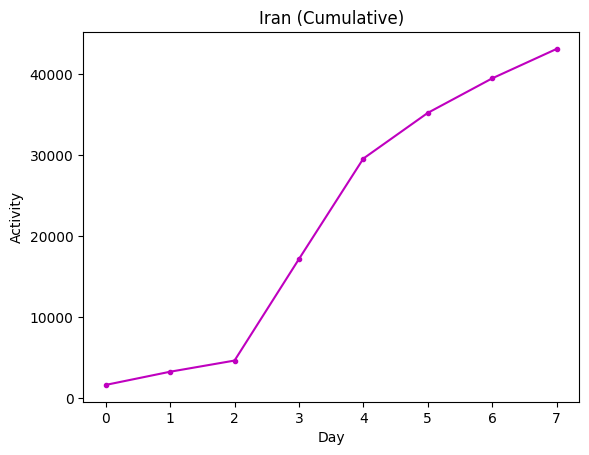

In [21]:
data_iran_cumul = np.cumsum(data_iran2)
print(data_iran_cumul)
plt.plot(data_iran_cumul, 'm.-')
plt.title('Iran (Cumulative)')
plt.xlabel('Day')
plt.ylabel('Activity')

,iran_scaled
0,1629.072682
1,2443.609023
2,3258.145364
3,3947.368422
4,4636.591480
5,10902.255640
6,17167.919800
7,23370.927320
8,29573.934840
9,32393.483713


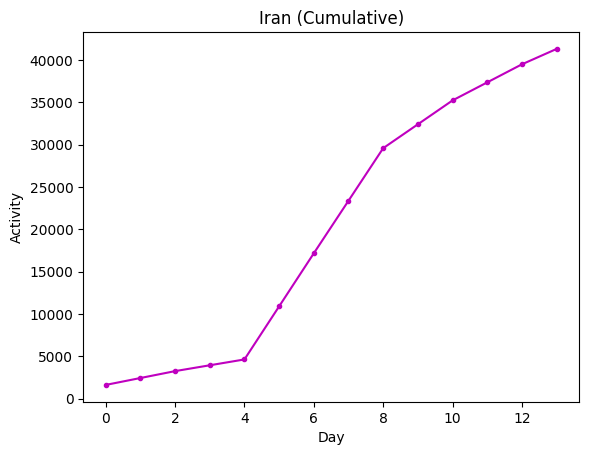

In [22]:
new_data_iran_cumul = interpolator(data_iran_cumul, 'Iran (Cumulative)')
new_data_iran_cumul

##BRICS:

Text(0, 0.5, 'Activity')

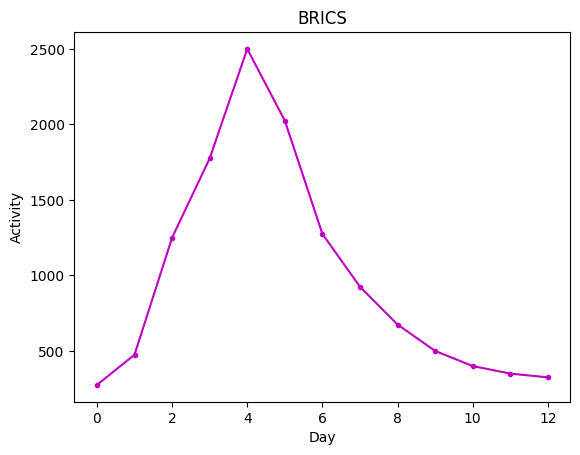

In [23]:
data_brics = pd.DataFrame(data_Google['brics'])
data_brics = data_brics[80:].reset_index(drop=True)
plt.plot(data_brics, 'm.-')
plt.title('BRICS')
plt.xlabel('Day')
plt.ylabel('Activity')

    brics
0     275
1     750
2    2000
3    3775
4    6275
5    8300
6    9575
7   10500
8   11175
9   11675
10  12075
11  12425
12  12750


Text(0, 0.5, 'Activity')

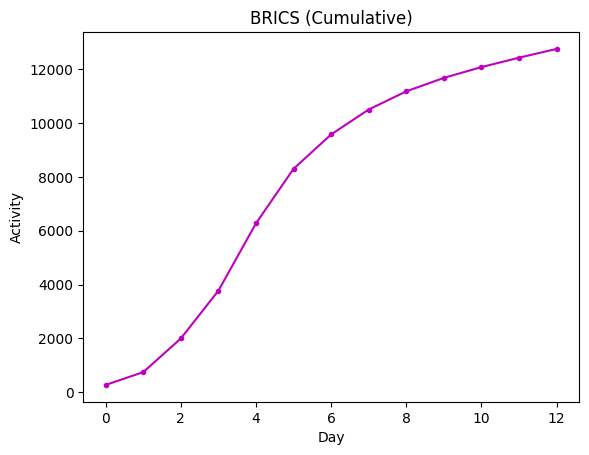

In [24]:
data_brics_cumul = np.cumsum(data_brics)
print(data_brics_cumul)
plt.plot(data_brics_cumul, 'm.-')
plt.title('BRICS (Cumulative)')
plt.xlabel('Day')
plt.ylabel('Activity')

,brics
0,275.0
1,512.5
2,750.0
3,1375.0
4,2000.0
5,2887.5
6,3775.0
7,5025.0
8,6275.0
9,7287.5


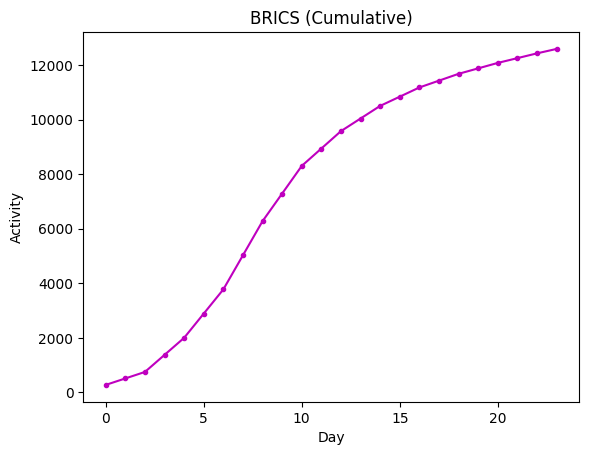

In [25]:
new_data_brics_cumul = interpolator(data_brics_cumul, 'BRICS (Cumulative)')
new_data_brics_cumul

## Algorithm-Enhanced Model Fitting:

In [29]:
def gamma_func(beta, B_star_val, pop, I0):
  gamma = 1/B_star_val * (pop - (pop-I0)*np.exp(-beta*B_star_val))
  # if gamma > (pop-I0)*beta*np.exp(-beta*B_star_val):
  #   print("Asymp. Stable")
  # else:
  #   print("Unstable")
  return gamma


In [31]:
def ODE_Bstar(t, B, beta, gamma, pop, I0):
    # return 2.0 * p[1] - p[0] * y[0] -p[0]*y[0]**2
    dBdt = [pop -  gamma*B - (pop-I0) * np.exp(-beta*B)]
    return dBdt

B0 = 0

def model_solver(mod, t, beta, gamma, pop, I0):
    Solution = pd.DataFrame()
    sol=scipy.integrate.odeint(mod,B0,t,args=(beta,gamma, pop, I0))
    sol=np.array(sol)
    Solution['time']=t
    Solution['B*'] = sol
    return Solution

In [32]:
def dBdt(t, B):
    # return 2.0 * p[1] - p[0] * y[0] -p[0]*y[0]**2
    return pop -  gamma*B - (pop-I0) * np.exp(-beta*B)

def model_solver(mod, times, beta, B_star_final, pop, I0):
    B0=0
    t = np.linspace(0, 1000, 1001)
    gamma = gamma_func(beta, B_star_final, pop, I0)
    sol = scipy.integrate.odeint(dBdt, y0=0, t=times, tfirst=True)
    return sol

In [33]:
def model_solver(mod, times, beta, gamma, B_star_final, pop, I0):
    B0=0
    t = np.linspace(0, 1000, 1001)
    gamma = gamma_func(beta, B_star_final, pop, I0)
    # print(gamma)
    sol = scipy.integrate.odeint(dBdt, y0=0, t=times, tfirst=True)
    return sol

In [34]:
def fitter(beta, gamma, dt, max_time, B_star_final, pop, I0, new_data, label):

    t = np.linspace(0, max_time, int(max_time/dt)+1)
    gamma = gamma_func(beta, B_star_final, pop, I0)
    # print(gamma)
    sol_m1=model_solver(dBdt, t, beta, gamma, B_star_final, pop, I0)
    Solution = pd.DataFrame()
    Solution['time'] = t
    Solution['B*'] = sol_m1

    Sum=0

    for i in range(len(t)):
      for j in range(len(new_data)):
        if abs(Solution['time'][i] - j)<0.0001:
          diff = (Solution['B*'][i] - new_data[label][j])**2
        else:
          diff=0
        Sum = Sum + diff
    # print(Sum)
    return Sum

## "Entertainment" topics:

##Raygun:

In [35]:
dt = 0.1
max_time = 80
# beta = 0.0001
B_star_final = 16500
pop = 300000
I0 = 300
new_data = new_data_raygun_cumul
label='raygun'

beta_vals = np.linspace(0.000006, 0.000011, 501) #[0.000009]

SumSq = []
Beta = []
Gamma1 = []


for beta in beta_vals:
      gamma = gamma_func(beta, B_star_final, pop, I0)
      Result = fitter(beta, gamma, dt, max_time, B_star_final, pop, I0, new_data, label)
      Beta.append(beta)
      Gamma1.append(gamma)
      SumSq.append(Result)

ParamFit = pd.DataFrame([Beta, Gamma1, SumSq]).T
ParamFit.columns=['Beta', 'Gamma1', 'SumSq']
# print(ParamFit)

BestFit = pd.DataFrame()
BestFit = ParamFit.loc[ParamFit['SumSq']==ParamFit['SumSq'].min()]

print(BestFit)
BestFit = BestFit.to_numpy()

        Beta    Gamma1         SumSq
434  0.00001  2.867142  2.701940e+06


In [39]:
print(BestFit[0,0])
print(BestFit[0,1])

1.034e-05
2.8671420426873144


1.034e-05
2.8671420426873144
2701940.114980803


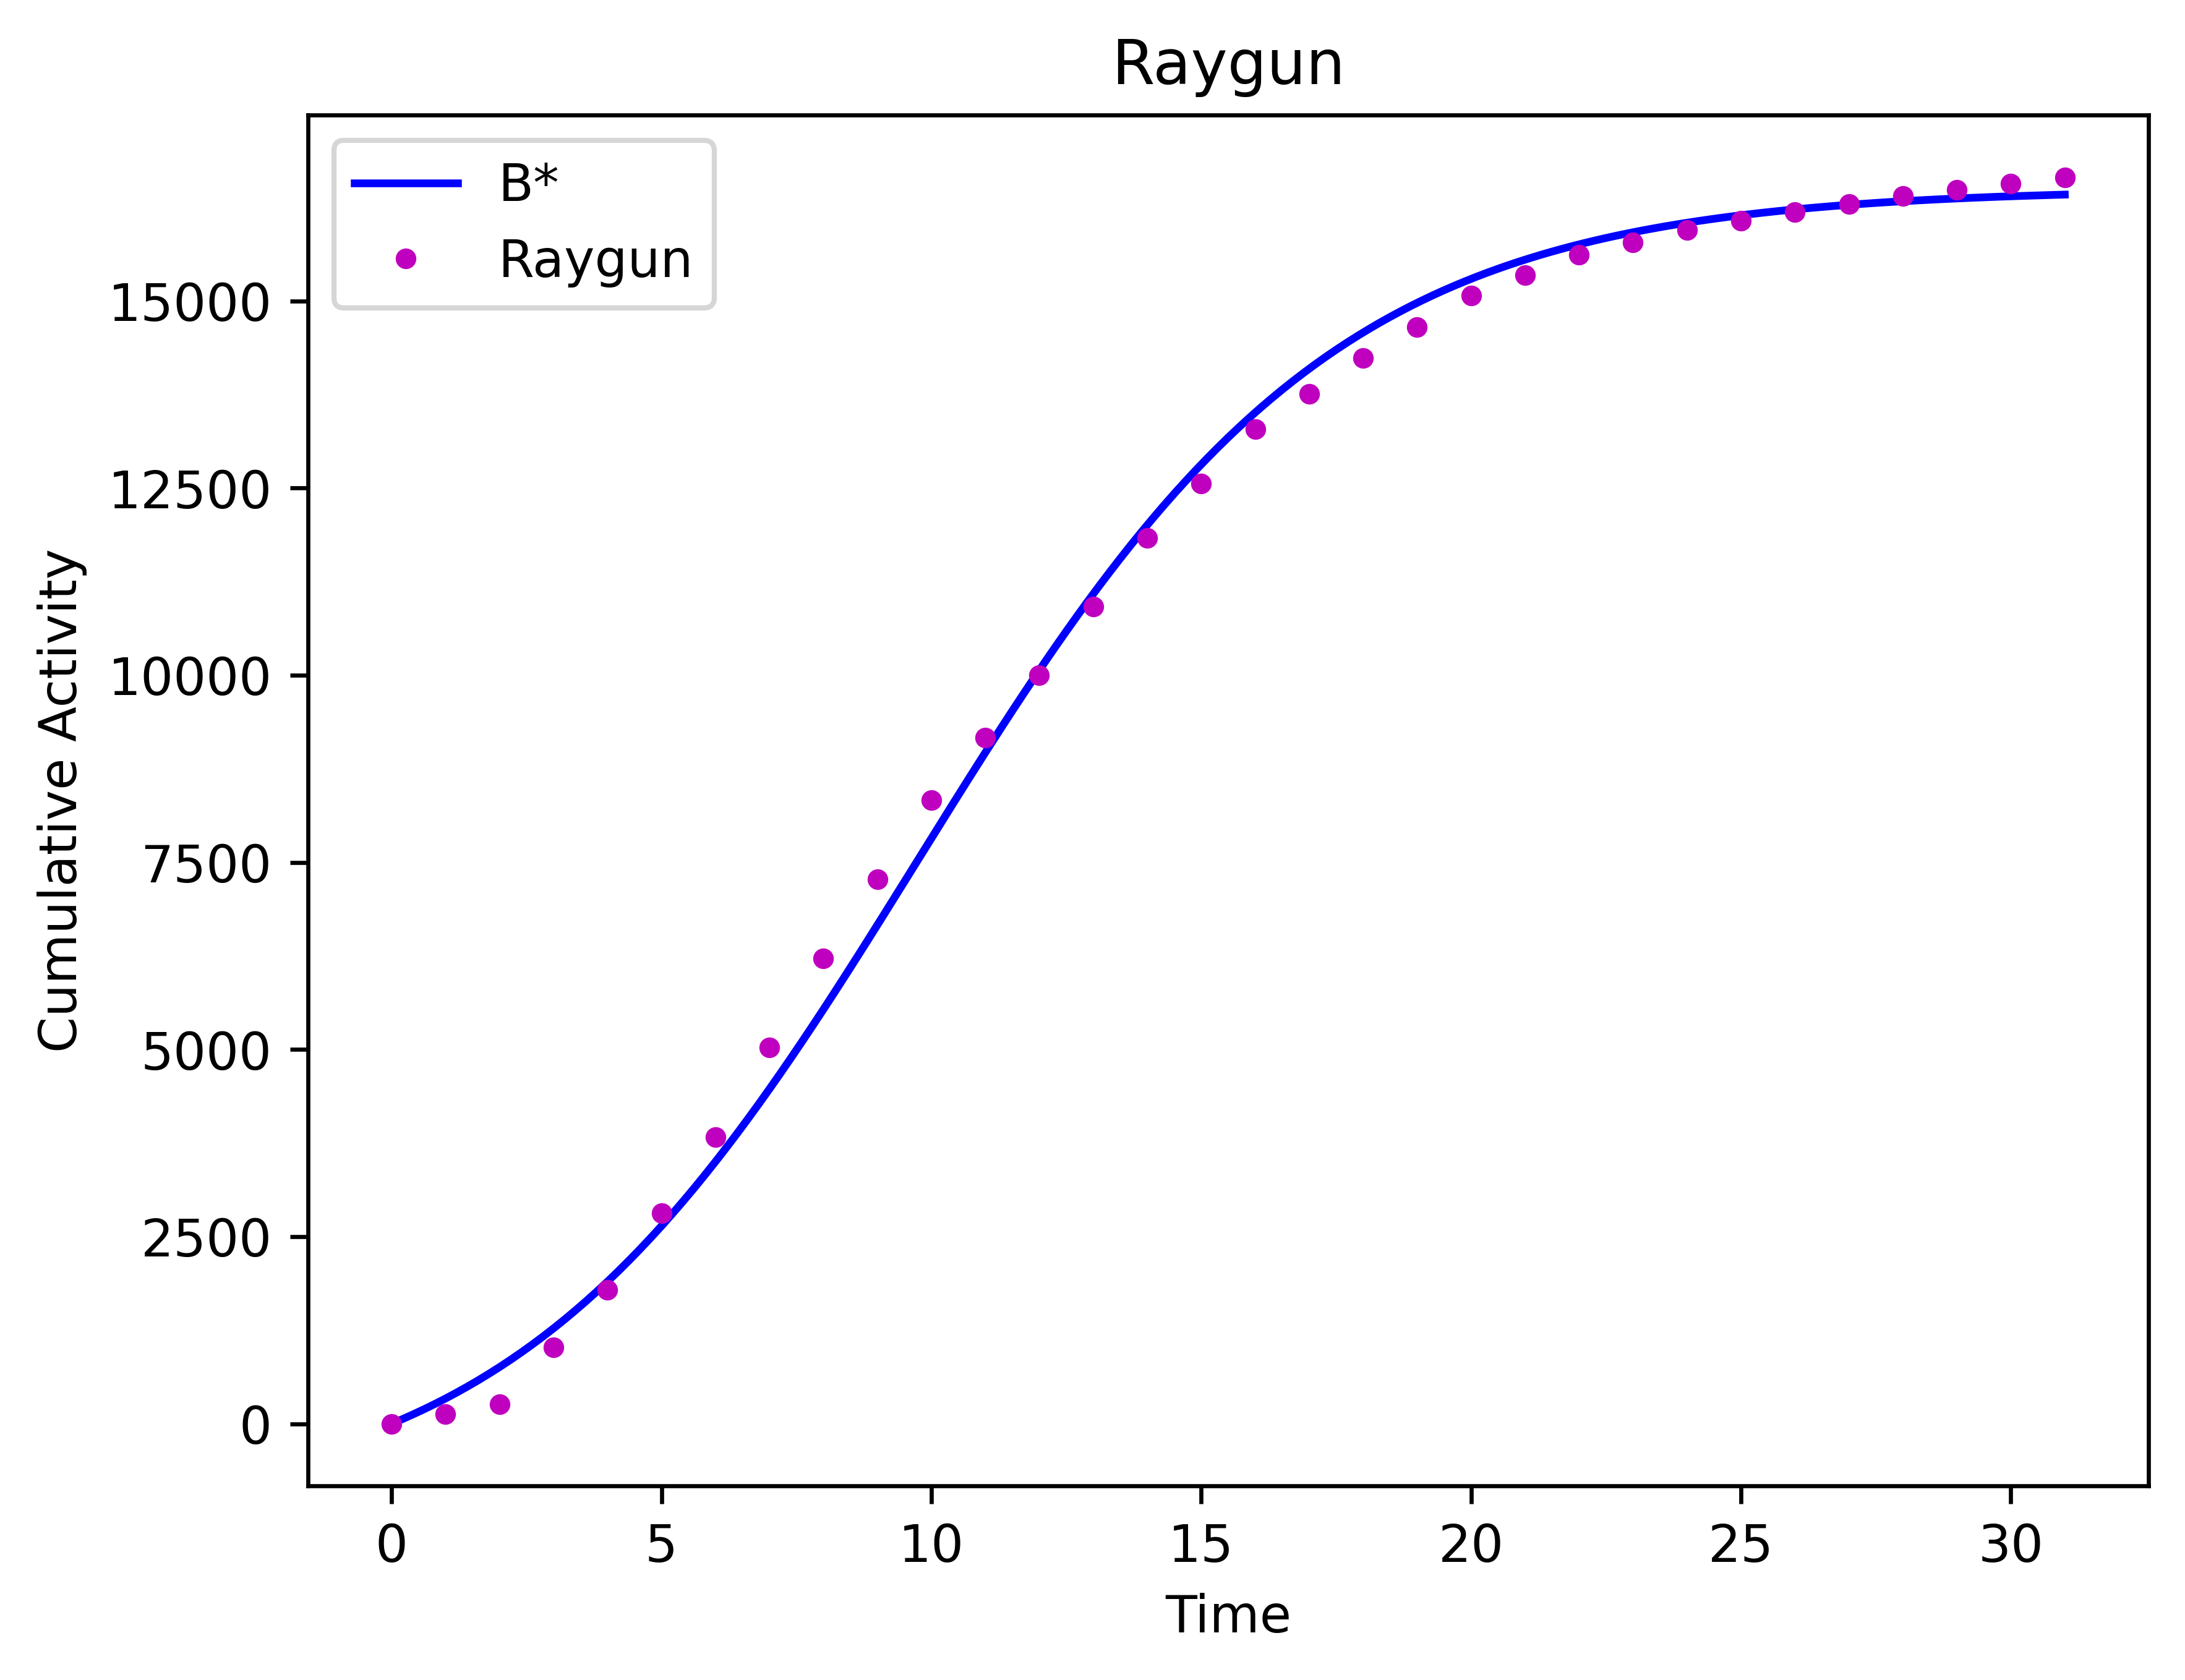

In [40]:
beta = BestFit[0,0]
print(beta)

gamma = gamma_func(beta, B_star_final, pop, I0)
print(gamma)
Result = fitter(beta, gamma, dt, max_time, B_star_final, pop, I0, new_data, label)
print(Result)


max_time = 31
t = np.linspace(0, max_time, int(max_time/dt)+1)
solution = model_solver(dBdt, t, beta, gamma, B_star_final, pop, I0)
Solution = pd.DataFrame()
Solution['time'] = t
Solution['B*'] = solution

Solution

plt.figure(dpi=600)
plt.plot(Solution['time'], Solution['B*'], 'b-', label='B*')
plt.plot(new_data_raygun_cumul, 'm.', label='Raygun')
plt.xlabel('Time')
plt.ylabel('Cumulative Activity')
plt.title('Raygun')
plt.legend()

## Moo Deng:

In [41]:
dt = 0.1
max_time = 75
# beta = 0.0001
# B_star_final = 10000
pop = 300000
I0 = 20
new_data = new_data_moo_cumul[:-10]
label='moo_deng_scaled'

beta_vals = np.linspace(0.000007, 0.000009, 101) #[0.000008]
B_star_final_vals = np.linspace(8500, 9500, 6) #[9500]

SumSq = []
Beta = []
Gamma1 = []
Pop = []


for beta in beta_vals:
  for B_star_final in B_star_final_vals:
      gamma = gamma_func(beta, B_star_final, pop, I0)
      Result = fitter(beta, gamma, dt, max_time, B_star_final, pop, I0, new_data, label)
      Beta.append(beta)
      Gamma1.append(gamma)
      SumSq.append(Result)
      Pop.append(B_star_final)

ParamFit = pd.DataFrame([Beta, Gamma1, SumSq, Pop]).T
ParamFit.columns=['Beta', 'Gamma1', 'SumSq', 'B_star_final']
# print(ParamFit)

BestFit = pd.DataFrame()
BestFit = ParamFit.loc[ParamFit['SumSq']==ParamFit['SumSq'].min()]

print(BestFit)
BestFit = BestFit.to_numpy()

         Beta   Gamma1          SumSq  B_star_final
423  0.000008  2.42813  915557.155769        9100.0


In [42]:
print(BestFit[0,0])
print(BestFit[0,1])

8.400000000000001e-06
2.4281295638019986


8.400000000000001e-06
2.4281295638019986
915557.1557691215


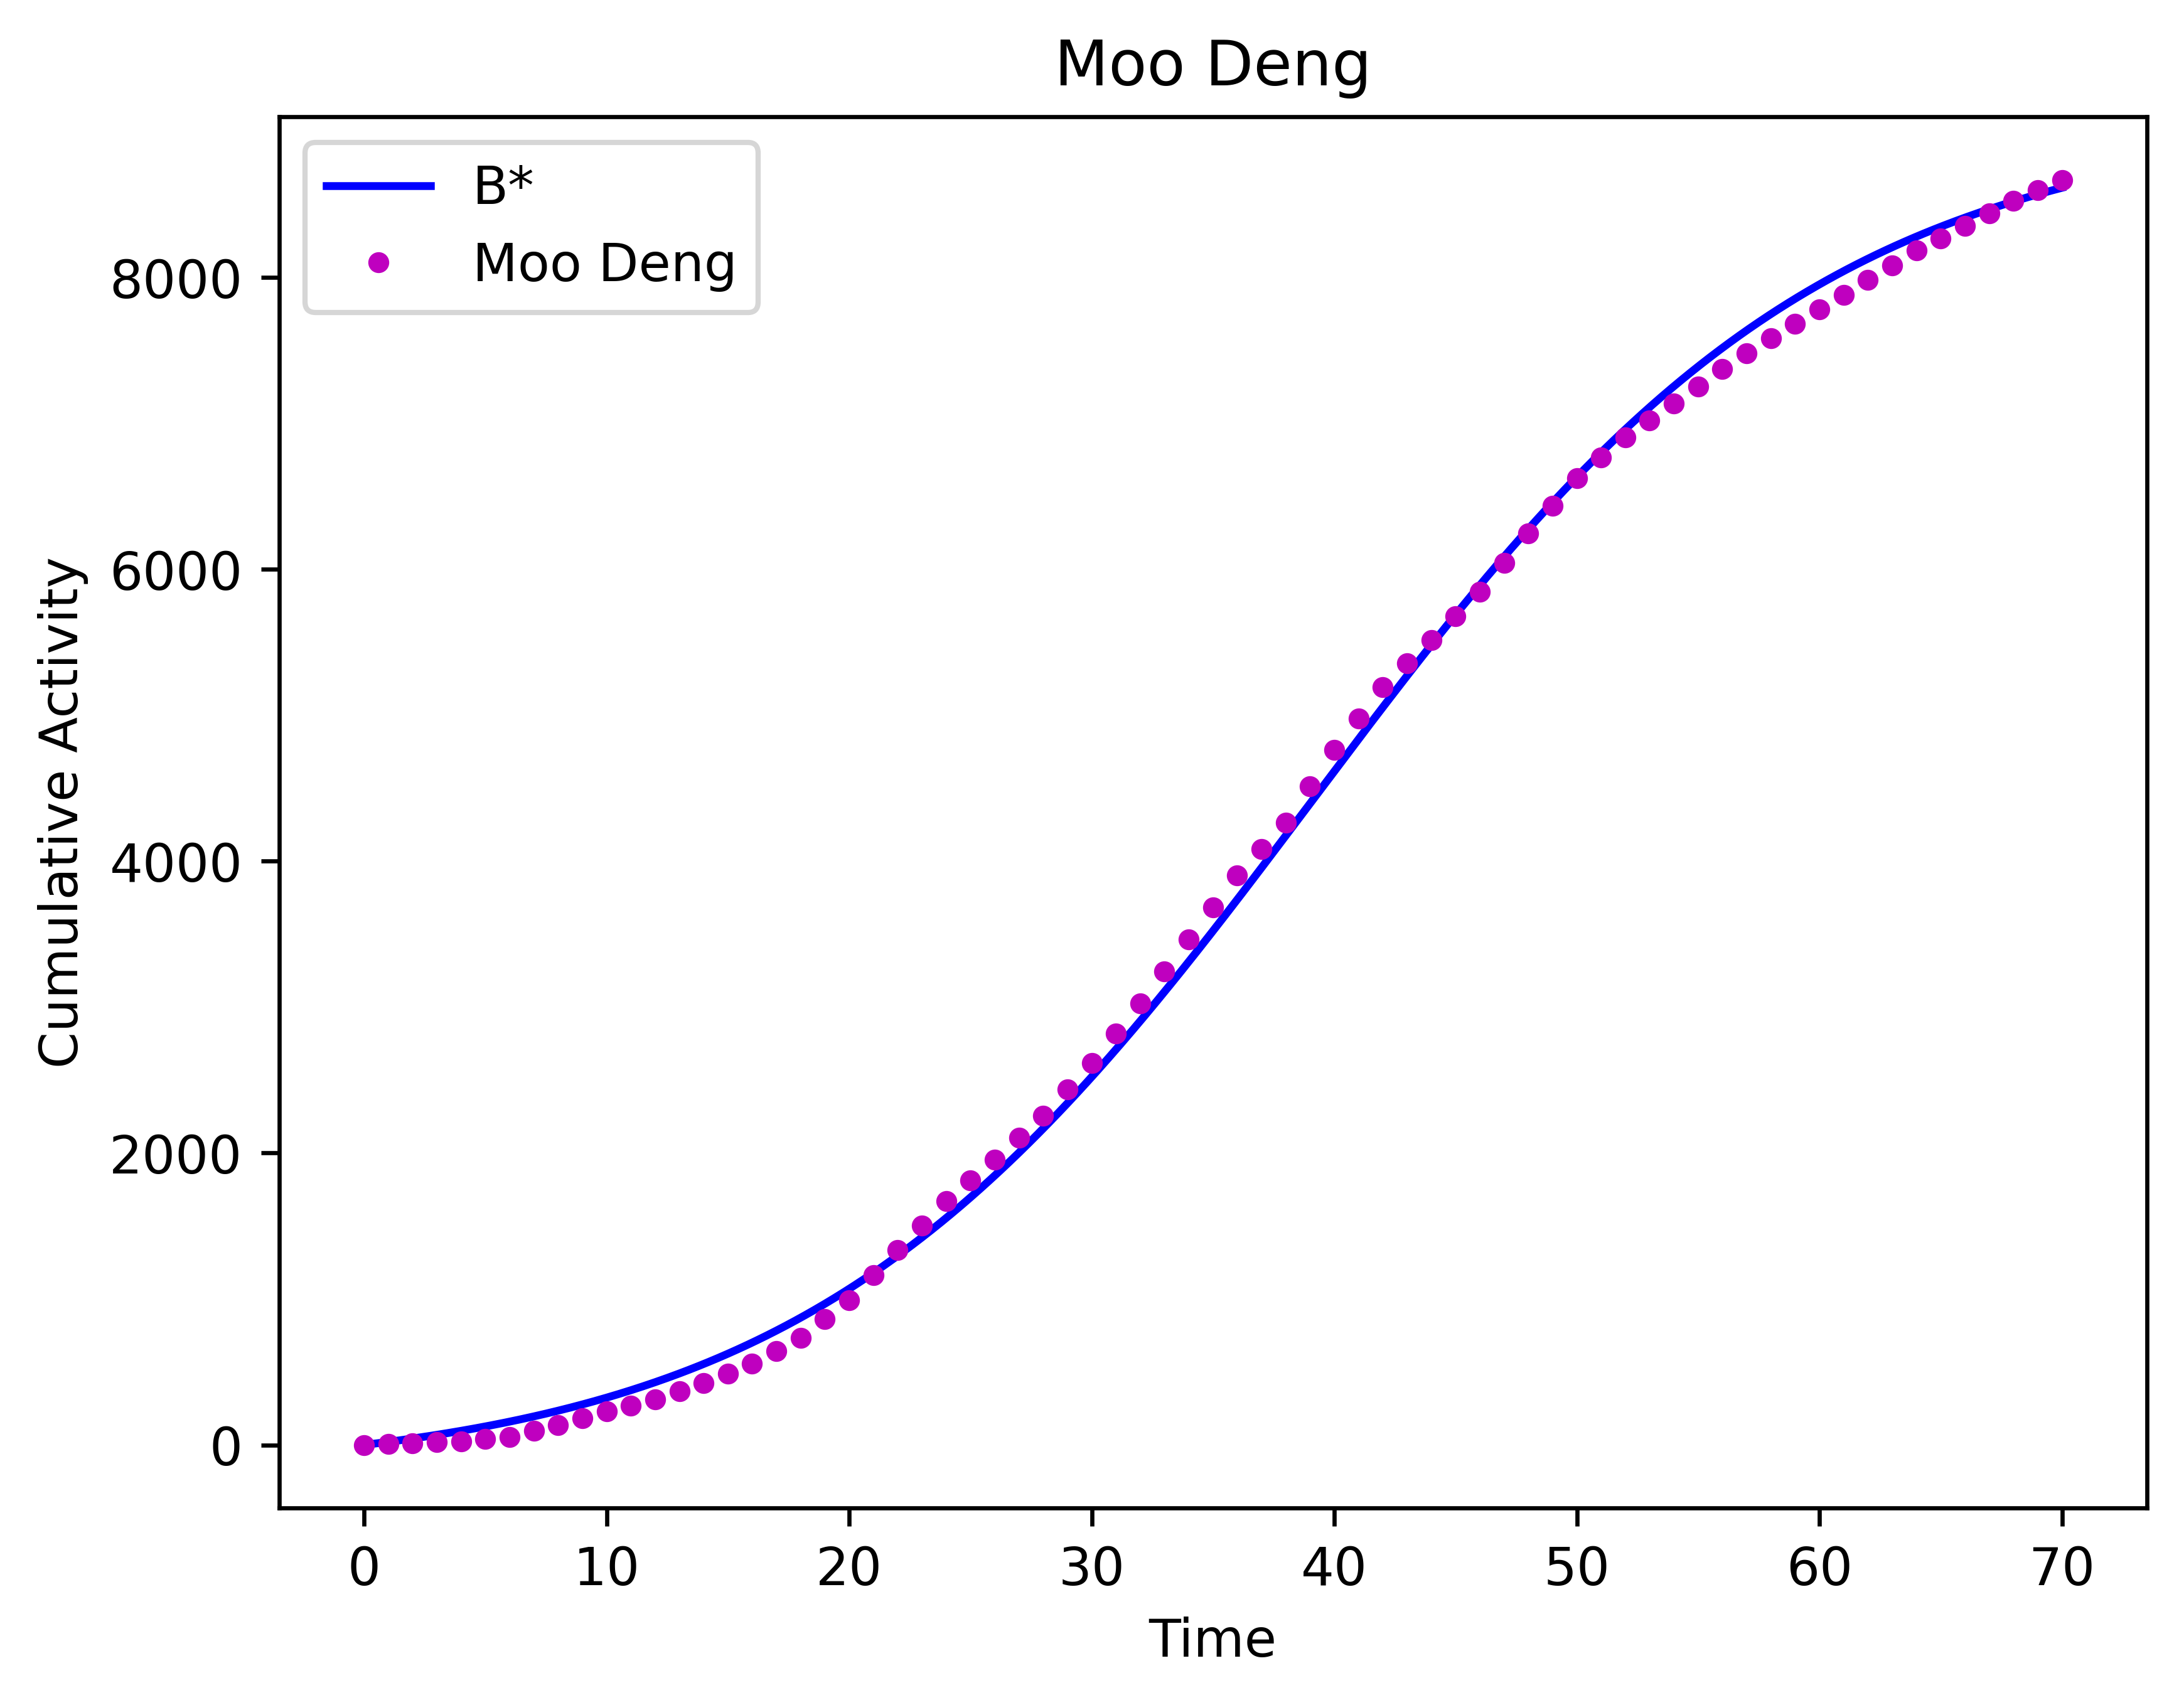

In [43]:
beta = BestFit[0,0]
B_star_final = BestFit[0,3]
print(beta)

gamma = gamma_func(beta, B_star_final, pop, I0)
print(gamma)
Result = fitter(beta, gamma, dt, max_time, B_star_final, pop, I0, new_data, label)
print(Result)


max_time = 70
t = np.linspace(0, max_time, int(max_time/dt)+1)
solution = model_solver(dBdt, t, beta, gamma, B_star_final, pop, I0)
Solution = pd.DataFrame()
Solution['time'] = t
Solution['B*'] = solution

Solution

plt.figure(dpi=600)
plt.plot(Solution['time'], Solution['B*'], 'b-', label='B*')
plt.plot(new_data_moo_cumul[:-15], 'm.', label='Moo Deng')
plt.xlabel('Time')
plt.ylabel('Cumulative Activity')
plt.title('Moo Deng')
plt.legend()

##Christopher Columbus DNA:

In [44]:
dt = 0.1
max_time = 10
# beta = 0.0001
B_star_final = 207
pop = 300000
I0 = 1
new_data = new_data_columb_cumul
label='columb_dna'

beta_vals = np.linspace(0.00015, 0.00025, 501)

SumSq = []
Beta = []
Gamma1 = []


for beta in beta_vals:
      gamma = gamma_func(beta, B_star_final, pop, I0)
      Result = fitter(beta, gamma, dt, max_time, B_star_final, pop, I0, new_data, label)
      Beta.append(beta)
      Gamma1.append(gamma)
      SumSq.append(Result)

ParamFit = pd.DataFrame([Beta, Gamma1, SumSq]).T
ParamFit.columns=['Beta', 'Gamma1', 'SumSq']
# print(ParamFit)

BestFit = pd.DataFrame()
BestFit = ParamFit.loc[ParamFit['SumSq']==ParamFit['SumSq'].min()]

print(BestFit)
BestFit = BestFit.to_numpy()

         Beta     Gamma1      SumSq
123  0.000175  51.449397  227.50452


In [45]:
print(BestFit[0,0])
print(BestFit[0,1])

0.0001746
51.449396557379615


0.0001746
51.449396557379615
227.5045200784182


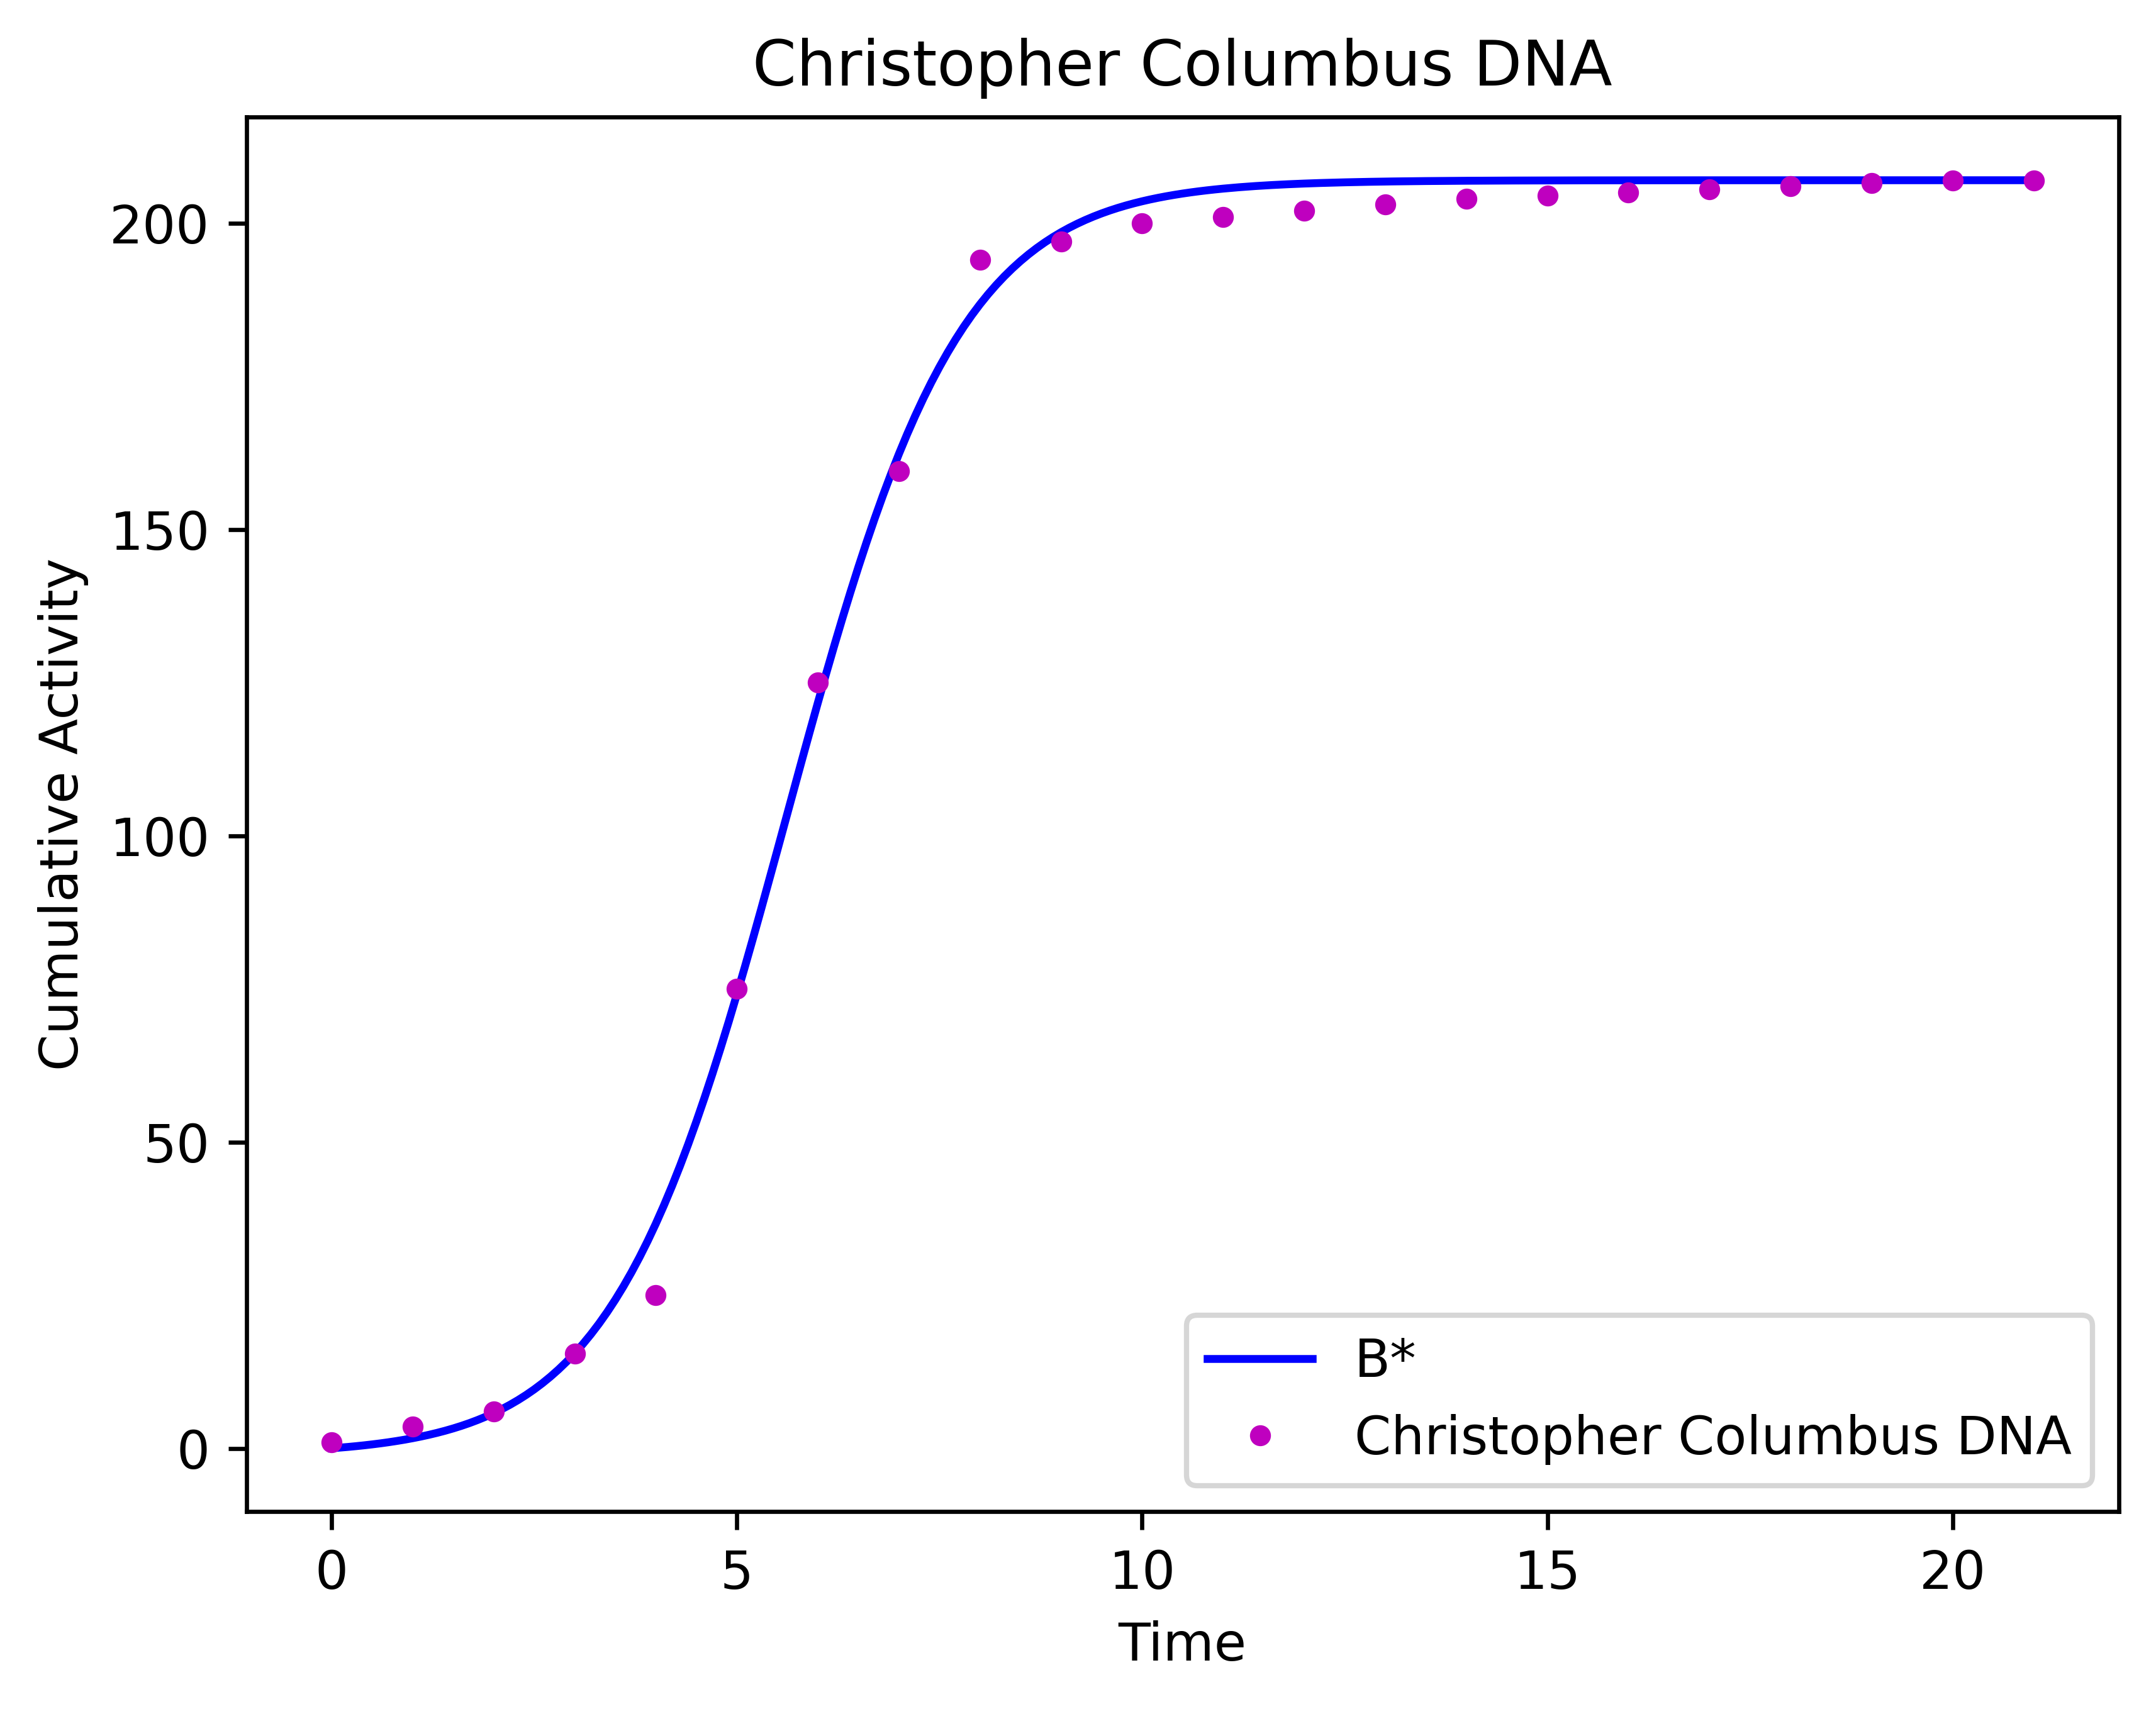

In [46]:
beta = BestFit[0,0]
print(beta)

gamma = gamma_func(beta, B_star_final, pop, I0)
print(gamma)
Result = fitter(beta, gamma, dt, max_time, B_star_final, pop, I0, new_data, label)
print(Result)


max_time = 21
t = np.linspace(0, max_time, int(max_time/dt)+1)
solution = model_solver(dBdt, t, beta, gamma, B_star_final, pop, I0)
Solution = pd.DataFrame()
Solution['time'] = t
Solution['B*'] = solution

Solution

plt.figure(dpi=600)
plt.plot(Solution['time'], Solution['B*'], 'b-', label='B*')
plt.plot(new_data_columb_cumul, 'm.', label='Christopher Columbus DNA')
plt.xlabel('Time')
plt.ylabel('Cumulative Activity')
plt.title('Christopher Columbus DNA')
plt.legend()

## "Fear" topics:

## Trump:

In [47]:
dt = 0.1
max_time = 10
# beta = 0.0001
B_star_final = 210000
pop = 300000
I0 = 2000
new_data = new_data_trump_cumul
label='trump_scaled'

beta_vals = np.linspace(0.0000065, 0.0000075, 501) # [0.0000068]
# print(beta_vals)

SumSq = []
Beta = []
Gamma1 = []


for beta in beta_vals:
      gamma = gamma_func(beta, B_star_final, pop, I0)
      Result = fitter(beta, gamma, dt, max_time, B_star_final, pop, I0, new_data, label)
      Beta.append(beta)
      Gamma1.append(gamma)
      SumSq.append(Result)

ParamFit = pd.DataFrame([Beta, Gamma1, SumSq]).T
ParamFit.columns=['Beta', 'Gamma1', 'SumSq']
# print(ParamFit)

BestFit = pd.DataFrame()
BestFit = ParamFit.loc[ParamFit['SumSq']==ParamFit['SumSq'].min()]

print(BestFit)
BestFit = BestFit.to_numpy()

         Beta    Gamma1         SumSq
234  0.000007  1.100096  3.790630e+08


In [48]:
print(BestFit[0,0])
print(BestFit[0,1])

6.968e-06
1.1000962632689095


6.968e-06
1.1000962632689095
379062978.6147103


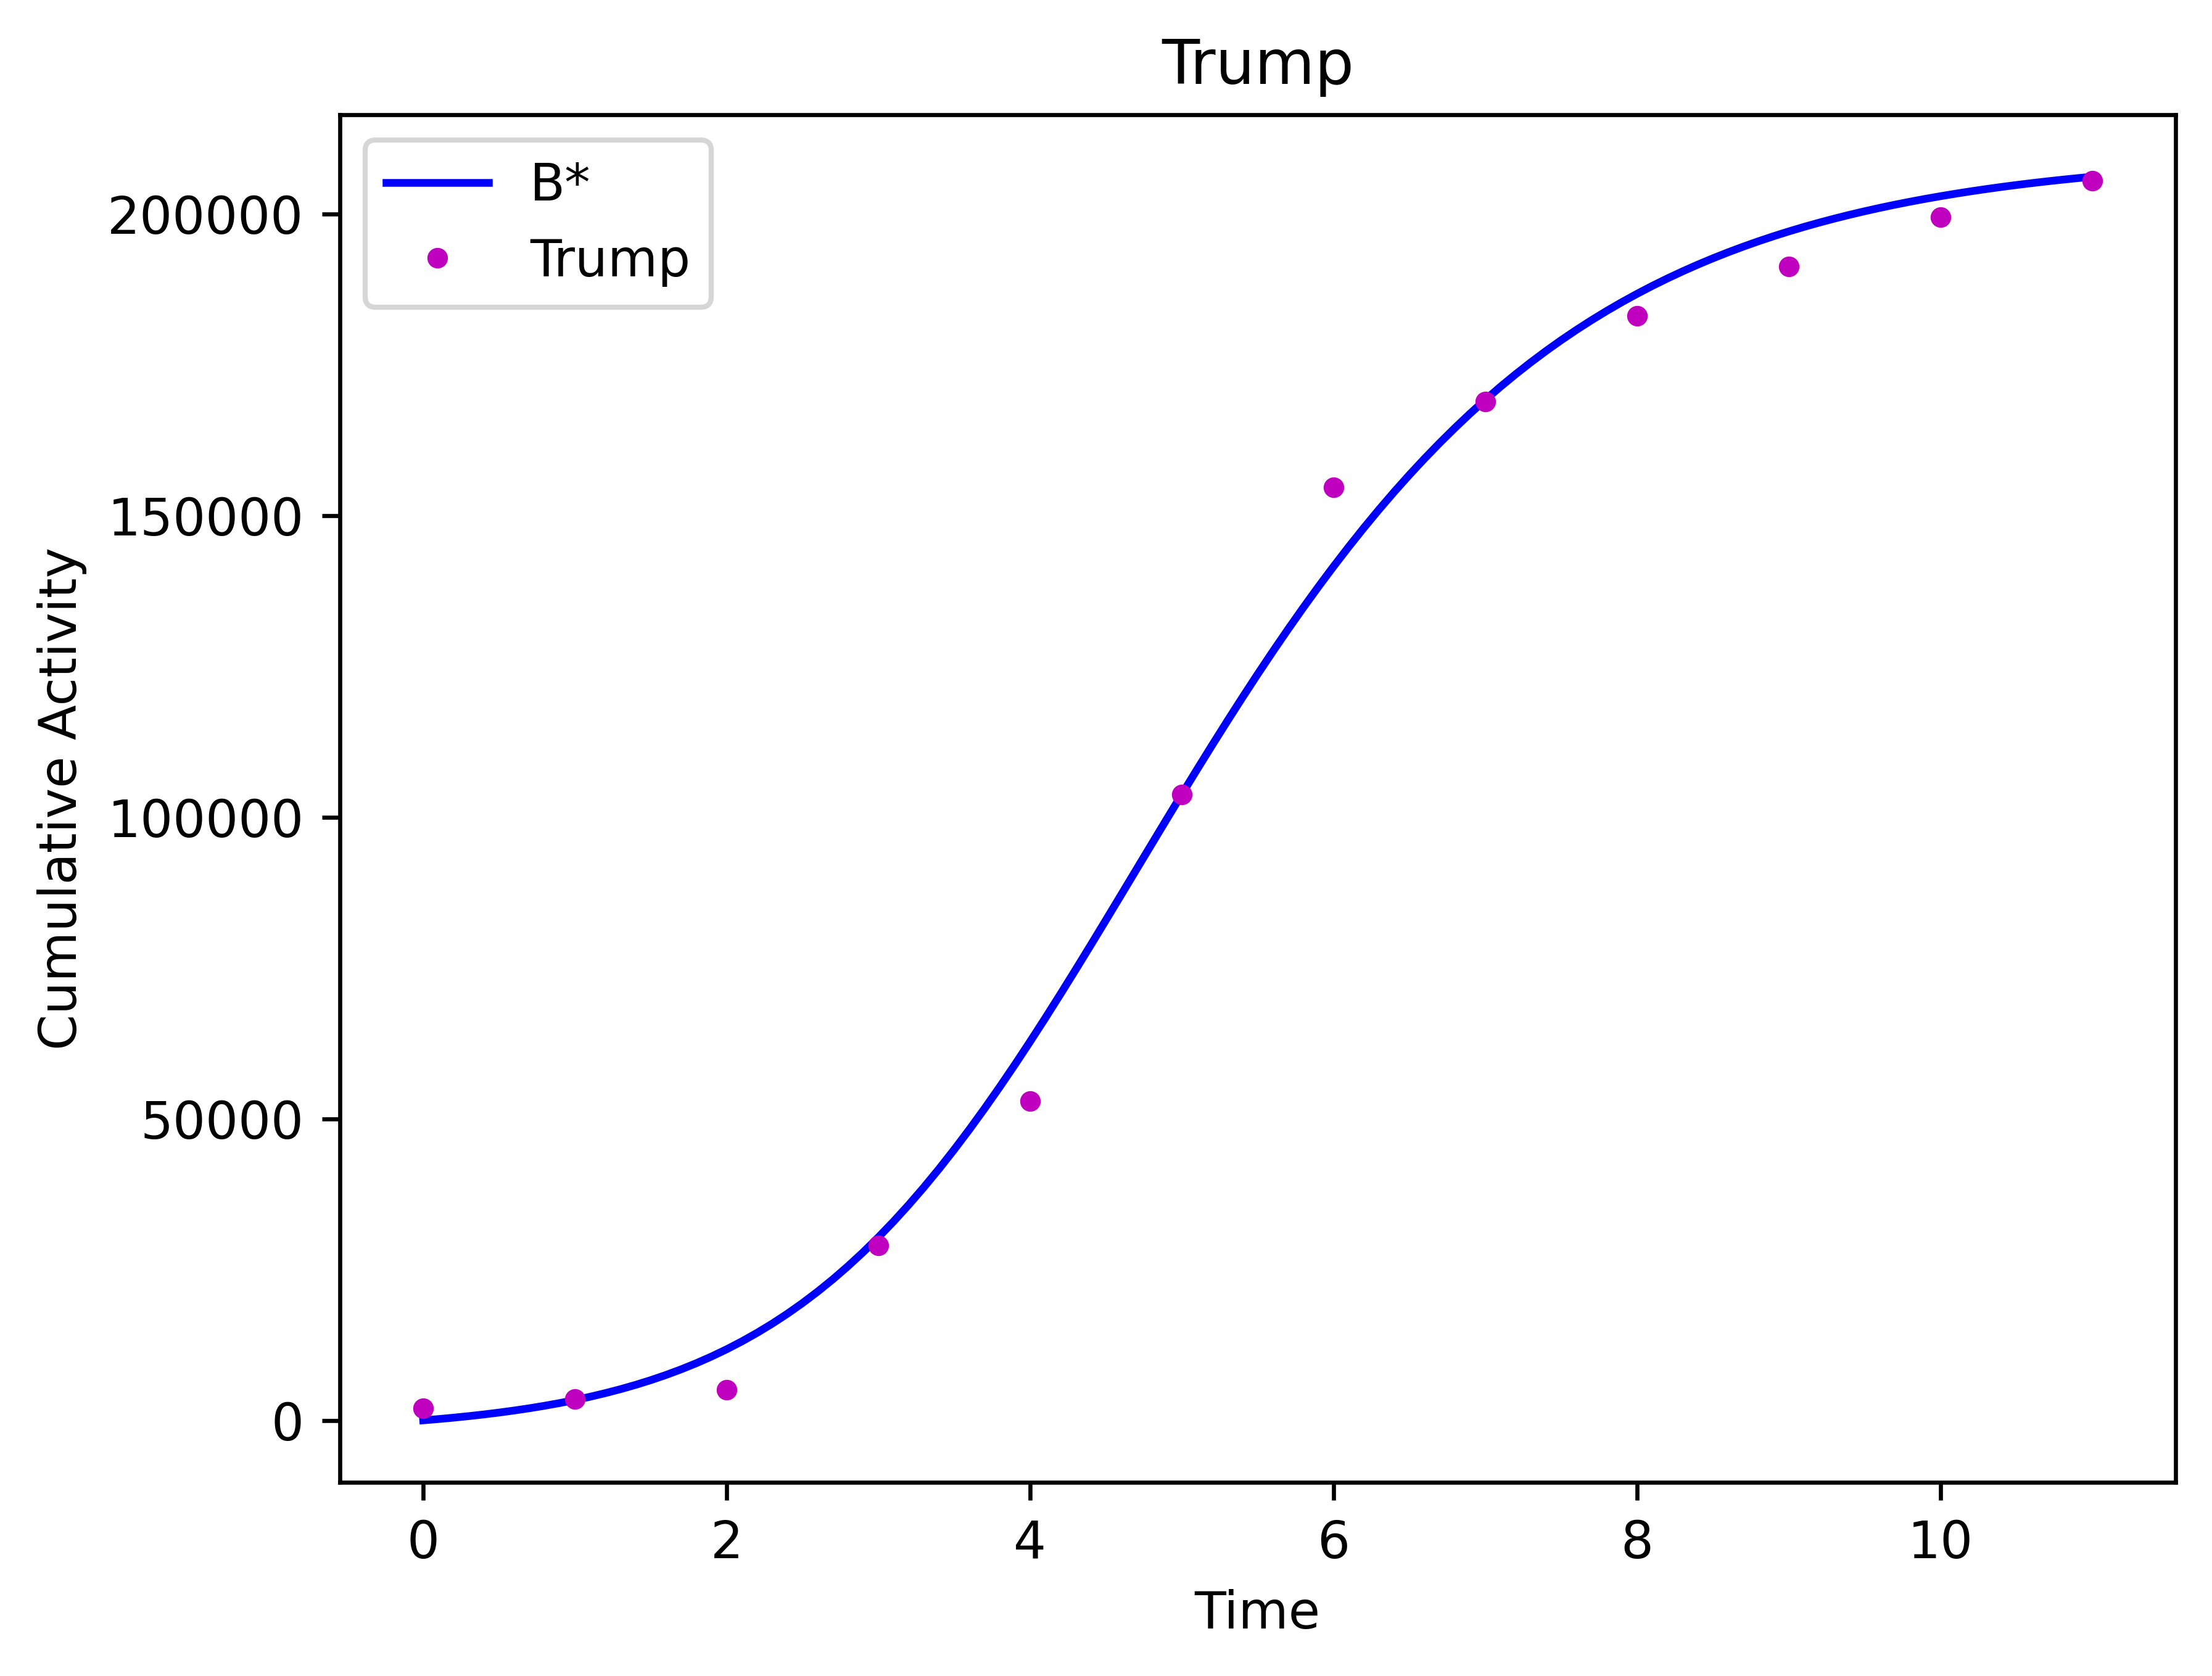

In [49]:
beta = BestFit[0,0]
print(beta)

gamma = gamma_func(beta, B_star_final, pop, I0)
print(gamma)
Result = fitter(beta, gamma, dt, max_time, B_star_final, pop, I0, new_data, label)
print(Result)


max_time = 11
t = np.linspace(0, max_time, int(max_time/dt)+1)
solution = model_solver(dBdt, t, beta, gamma, B_star_final, pop, I0)
Solution = pd.DataFrame()
Solution['time'] = t
Solution['B*'] = solution

Solution

plt.figure(dpi=600)
plt.plot(Solution['time'], Solution['B*'], 'b-', label='B*')
plt.plot(new_data_trump_cumul, 'm.', label='Trump')
plt.xlabel('Time')
plt.ylabel('Cumulative Activity')
plt.title('Trump')
plt.legend()

##Iran:

In [50]:
dt = 0.1
max_time = 18
# beta = 0.0001
B_star_final = 40000
pop = 300000
I0 = 150
new_data = new_data_iran_cumul - 2000
label='iran_scaled'

beta_vals = np.linspace(0.00001, 0.000015, 51) #[0.0000125]
B_star_final_vals = np.linspace(35000, 50000, 16)
# print(beta_vals)

SumSq = []
B_final = []
Beta = []
Gamma1 = []


for beta in beta_vals:
  for B_star_final in B_star_final_vals:
      gamma = gamma_func(beta, B_star_final, pop, I0)
      Result = fitter(beta, gamma, dt, max_time, B_star_final, pop, I0, new_data, label)
      B_final.append(B_star_final)
      Beta.append(beta)
      Gamma1.append(gamma)
      SumSq.append(Result)

ParamFit = pd.DataFrame([B_final, Beta, Gamma1, SumSq]).T
ParamFit.columns=['B_star_final', 'Beta', 'Gamma1', 'SumSq']
# print(ParamFit)

BestFit = pd.DataFrame()
BestFit = ParamFit.loc[ParamFit['SumSq']==ParamFit['SumSq'].min()]

print(BestFit)
BestFit = BestFit.to_numpy()

     B_star_final      Beta    Gamma1         SumSq
467       38000.0  0.000013  3.061598  1.364609e+07


In [51]:
print(BestFit[0,1])
print(BestFit[0,2])

1.29e-05
3.061597664078593


1.29e-05
3.061597664078593
13646089.635411445


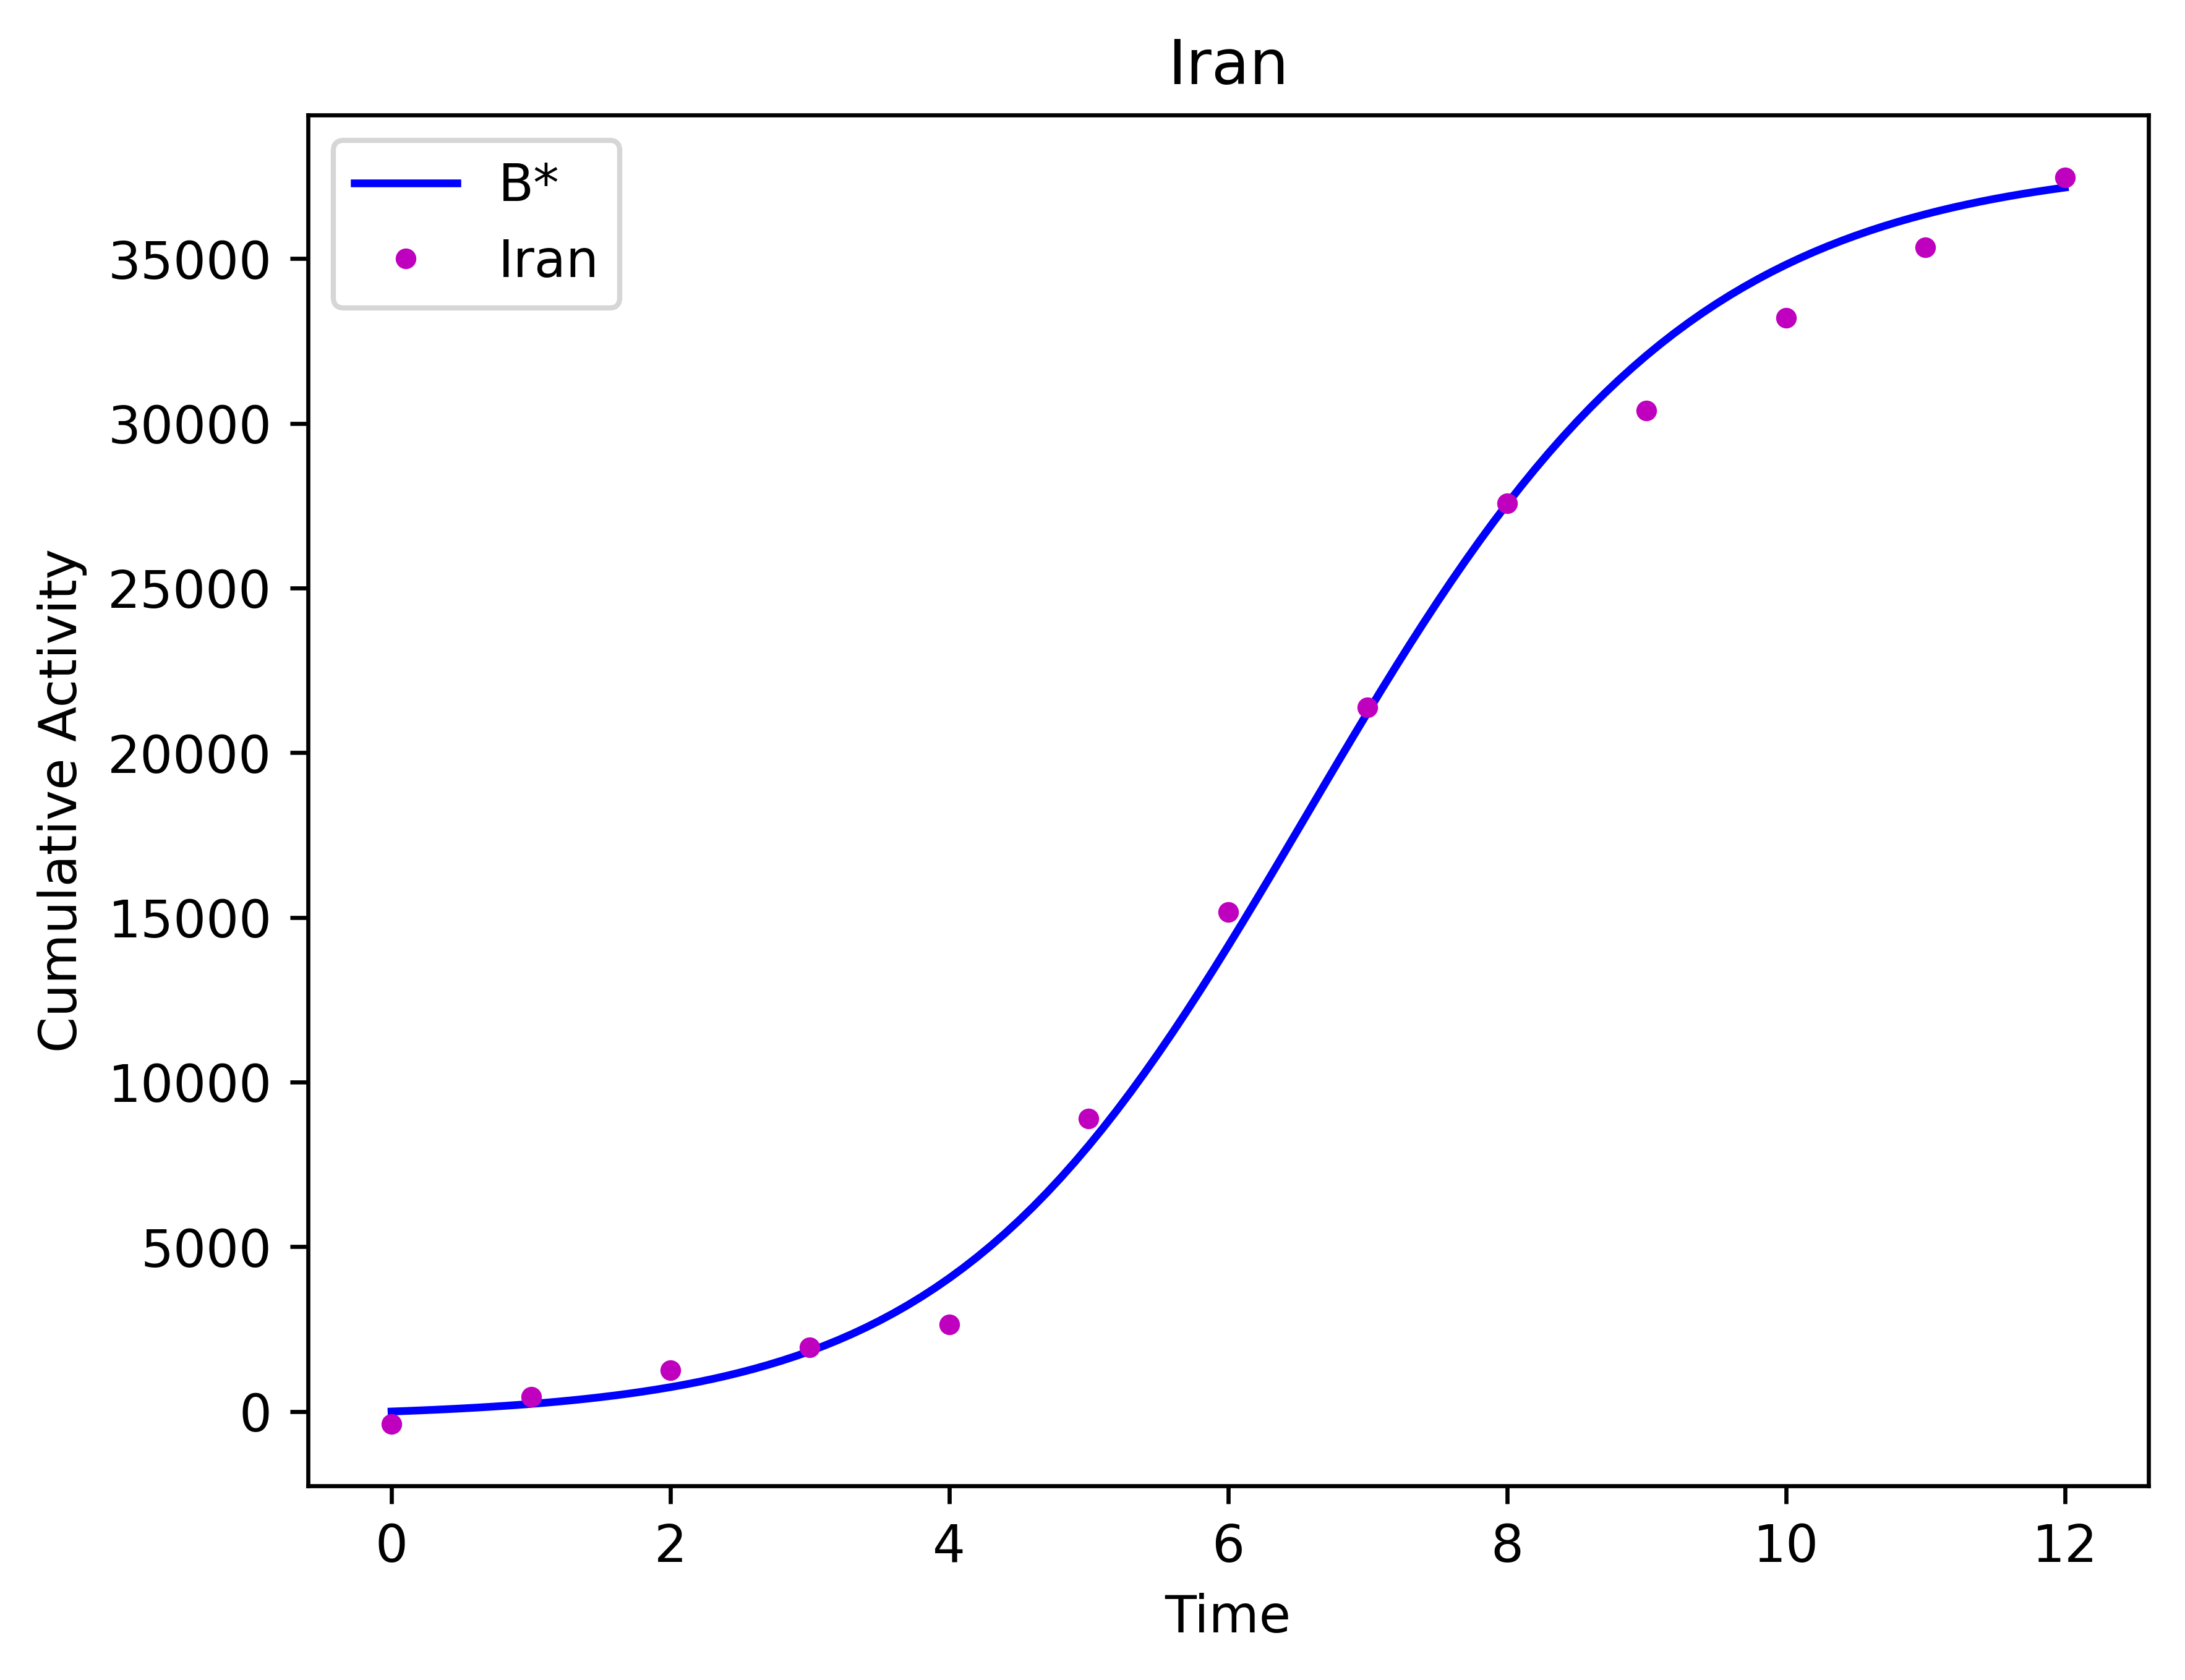

In [52]:
B_star_final = BestFit[0,0]
beta = BestFit[0,1]
print(beta)

gamma = gamma_func(beta, B_star_final, pop, I0)
print(gamma)
Result = fitter(beta, gamma, dt, max_time, B_star_final, pop, I0, new_data, label)
print(Result)


max_time = 12
t = np.linspace(0, max_time, int(max_time/dt)+1)
solution = model_solver(dBdt, t, beta, gamma, B_star_final, pop, I0)
Solution = pd.DataFrame()
Solution['time'] = t
Solution['B*'] = solution

# print(Solution)

plt.figure(dpi=600)
plt.plot(Solution['time'], Solution['B*'], 'b-', label='B*')
plt.plot(new_data_iran_cumul[:-1]-2000, 'm.', label='Iran')
plt.xlabel('Time')
plt.ylabel('Cumulative Activity')
plt.title('Iran')
plt.legend()

##BRICS:

In [53]:
dt = 0.1
max_time = 20
# beta = 0.0001
B_star_final = 12500
pop = 300000
I0 = 275
new_data = new_data_brics_cumul
label='brics'

beta_vals = np.linspace(0.00001, 0.000015, 501)
# print(beta_vals)

SumSq = []
Beta = []
Gamma1 = []


for beta in beta_vals:
      gamma = gamma_func(beta, B_star_final, pop, I0)
      Result = fitter(beta, gamma, dt, max_time, B_star_final, pop, I0, new_data, label)
      Beta.append(beta)
      Gamma1.append(gamma)
      SumSq.append(Result)

ParamFit = pd.DataFrame([Beta, Gamma1, SumSq]).T
ParamFit.columns=['Beta', 'Gamma1', 'SumSq']
# print(ParamFit)

BestFit = pd.DataFrame()
BestFit = ParamFit.loc[ParamFit['SumSq']==ParamFit['SumSq'].min()]

print(BestFit)
BestFit = BestFit.to_numpy()

         Beta   Gamma1         SumSq
331  0.000013  3.69714  1.541351e+06


In [54]:
print(BestFit[0,0])
print(BestFit[0,1])

1.331e-05
3.697140396681095


1.331e-05
3.697140396681095
1541350.9920738488


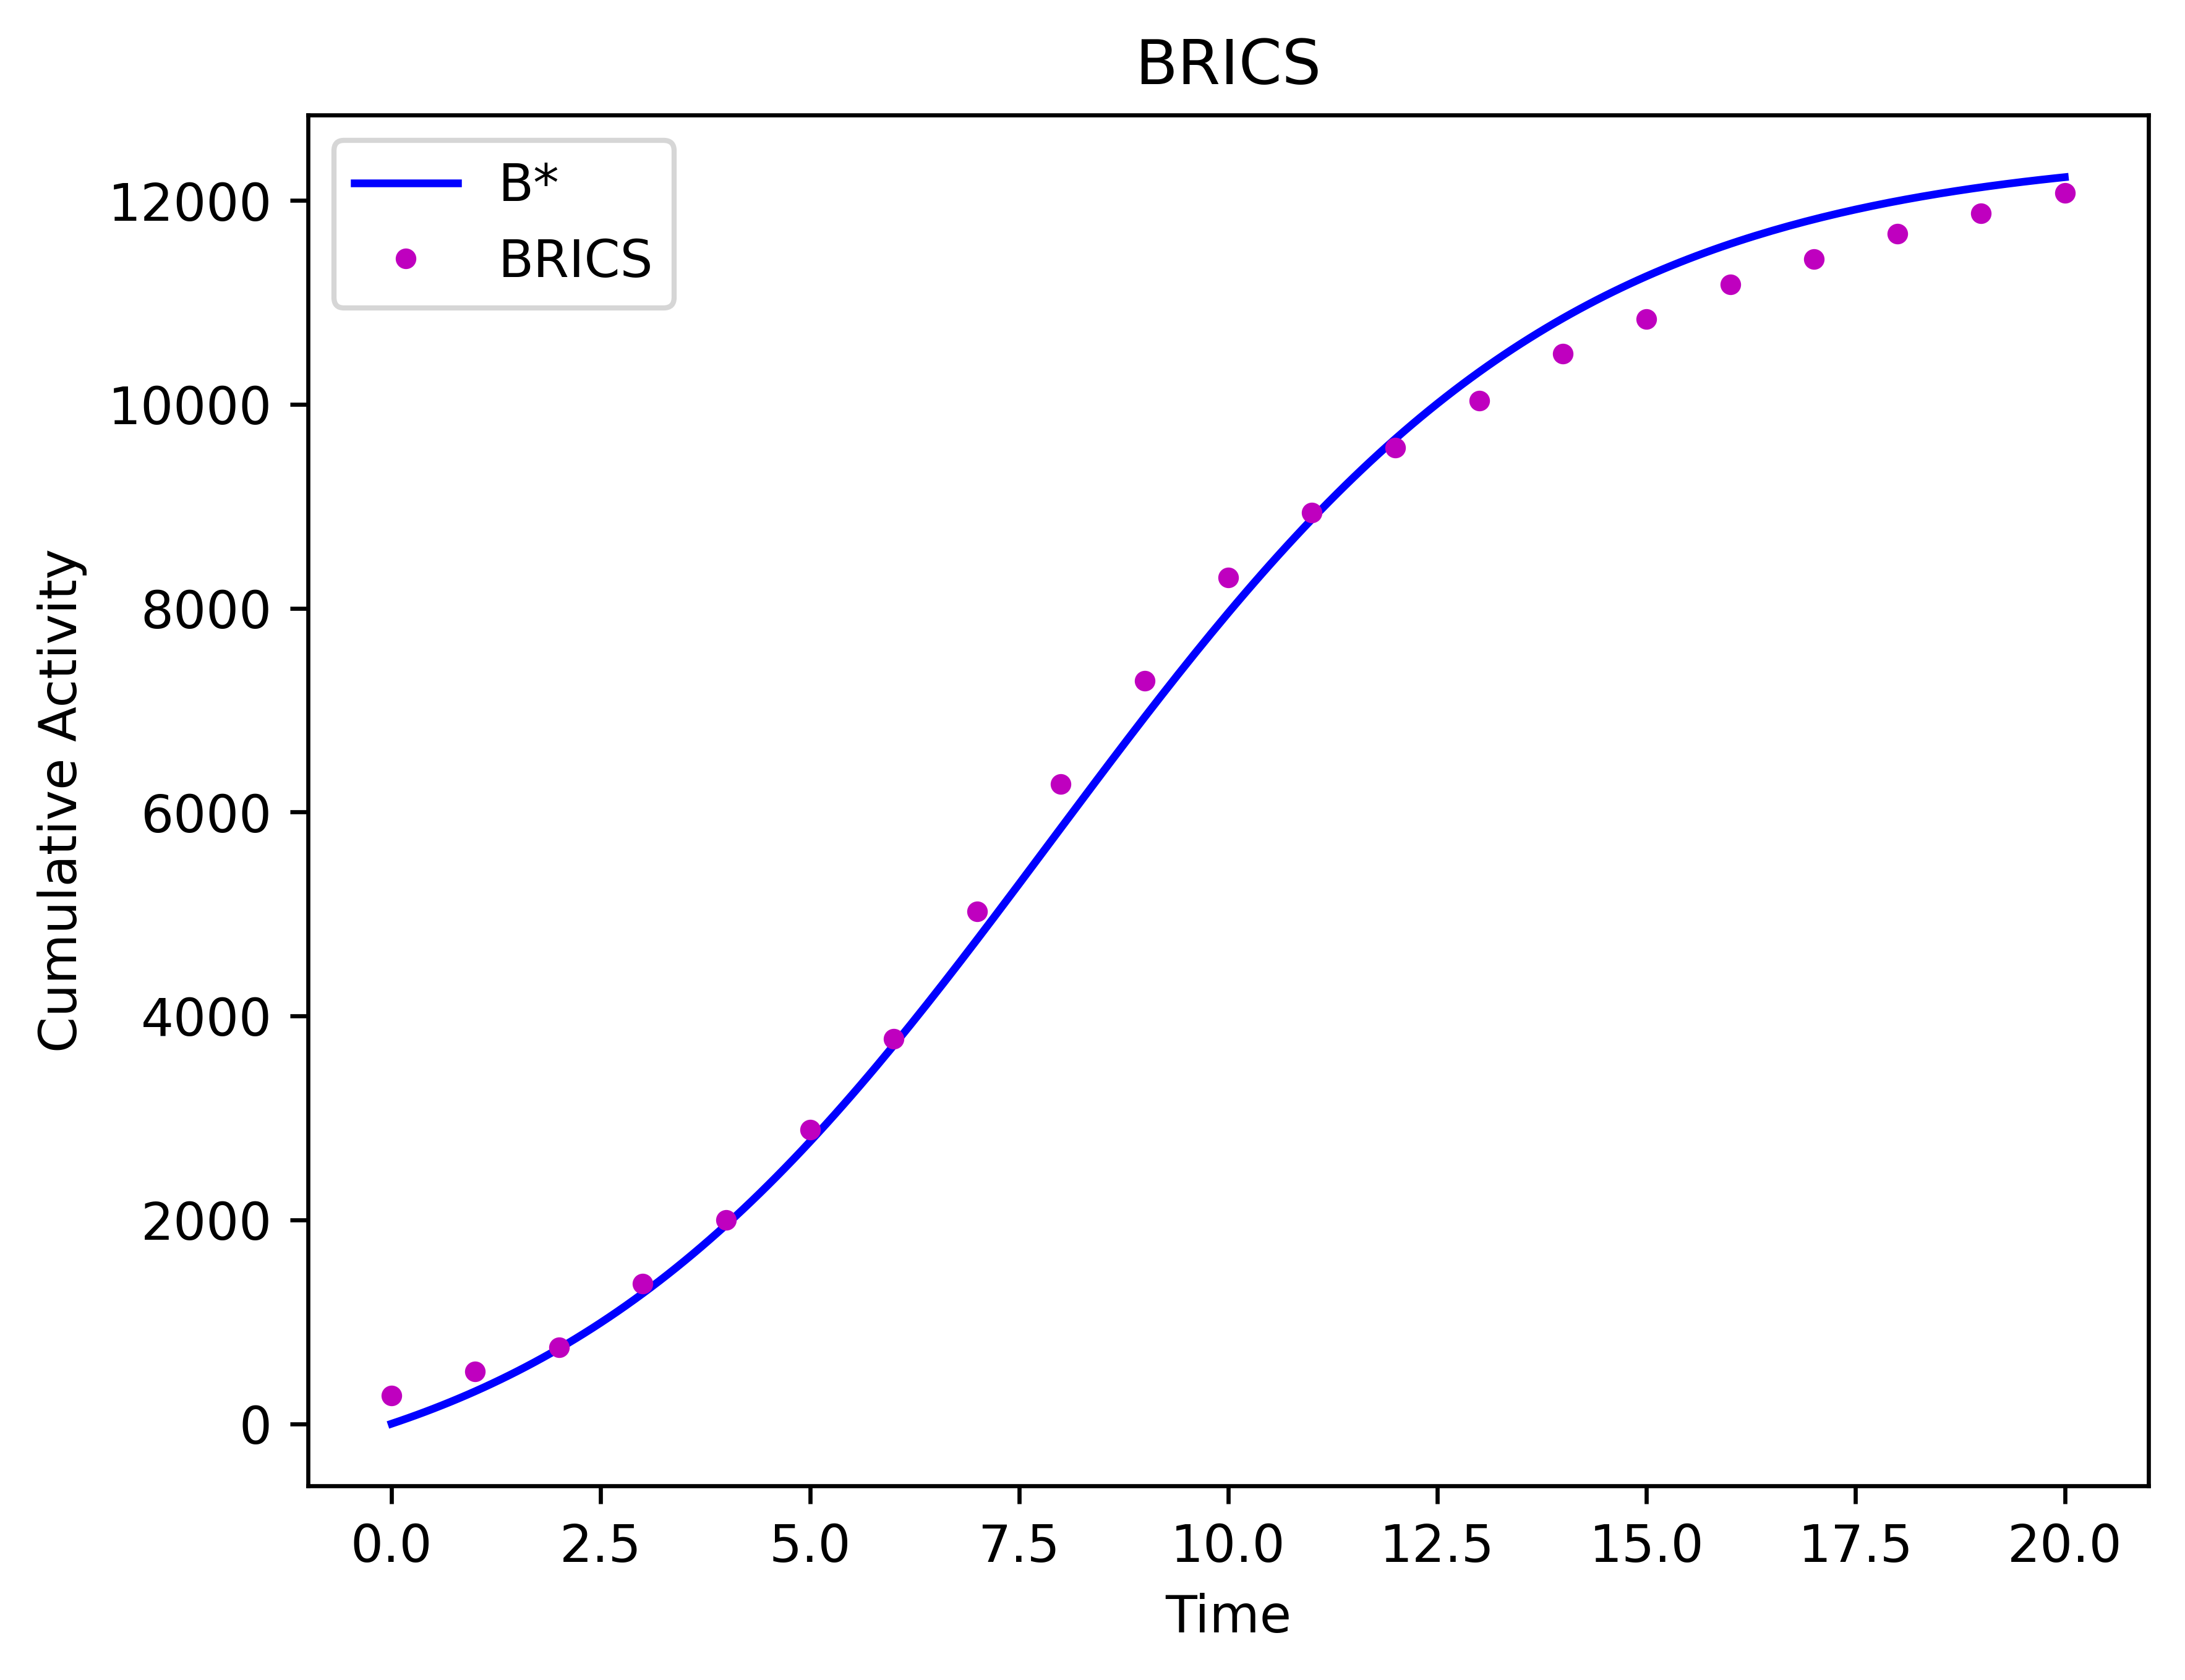

In [55]:
beta = BestFit[0,0]
print(beta)

gamma = gamma_func(beta, B_star_final, pop, I0)
print(gamma)
Result = fitter(beta, gamma, dt, max_time, B_star_final, pop, I0, new_data, label)
print(Result)


max_time = 20
t = np.linspace(0, max_time, int(max_time/dt)+1)
solution = model_solver(dBdt, t, beta, gamma, B_star_final, pop, I0)
Solution = pd.DataFrame()
Solution['time'] = t
Solution['B*'] = solution

Solution

plt.figure(dpi=600)
plt.plot(Solution['time'], Solution['B*'], 'b-', label='B*')
plt.plot(new_data_brics_cumul[:-3], 'm.', label='BRICS')
plt.xlabel('Time')
plt.ylabel('Cumulative Activity')
plt.title('BRICS')
plt.legend()